In [18]:
### Data Visuaization (1)
## NYC Taxi Data EDA
# how many calls by time?
# how many calls by day?
!pip install plotly cufflinks pandas numpy seaborn matplotlib pandas-gbq
!pip install chart_studio

  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Using cached pandas_gbq-0.14.0-py3-none-any.whl (24 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached pydata_google_auth-1.1.0-py2.py3-none-any.whl (13 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached protobuf-3.13.0-cp37-cp37m-win_amd64.whl (1.0 MB)
  Using cached pyarrow-1.0.1-cp37-cp37m-win_amd64.whl (10.5 MB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached googleapis_common_protos-1.52.0-py2.py3-none-any.whl (100 kB)
  Using cached google_crc32c-1.0.0-cp37-cp37m-win_amd64.whl (36 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.wh

In [19]:
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format='retina'
cf.go_offline()

0.17.3


In [38]:
%%time
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

df = pd.read_gbq(query=query, dialect='standard', project_id='nyctd-294708', auth_local_webserver=True)

Downloading: 100%|██████████| 744/744 [00:00<00:00, 1874.59rows/s]

Wall time: 2.3 s


In [37]:
df.tail(10)

pickup_hour    cnt
734 2015-01-31 14:00:00  25059
735 2015-01-31 15:00:00  25886
736 2015-01-31 16:00:00  23822
737 2015-01-31 17:00:00  25794
738 2015-01-31 18:00:00  30804
739 2015-01-31 19:00:00  32436
740 2015-01-31 20:00:00  27555
741 2015-01-31 21:00:00  27477
742 2015-01-31 22:00:00  29862
743 2015-01-31 23:00:00  29856

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pickup_hour  744 non-null    datetime64[ns]
 1   cnt          744 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [40]:
df['pickup_hour']=pd.to_datetime(df['pickup_hour'])

In [41]:
df.head()

pickup_hour    cnt
0 2015-01-01 00:00:00  28312
1 2015-01-01 01:00:00  31707
2 2015-01-01 02:00:00  28068
3 2015-01-01 03:00:00  24288
4 2015-01-01 04:00:00  17081

In [42]:
df = df.set_index('pickup_hour')

In [43]:
df.head()

cnt
pickup_hour               
2015-01-01 00:00:00  28312
2015-01-01 01:00:00  31707
2015-01-01 02:00:00  28068
2015-01-01 03:00:00  24288
2015-01-01 04:00:00  17081

In [44]:
df.iplot?

In [45]:
df.iplot(kind='scatter', xTitle='Datetimes',yTitle='Demand', title='NYC Taxi Demand(2015-01)')

In [46]:
## Jan 27, 2015 02:00, drastic decrease
# Jan 23rd, 2015, there was a huge snow storm with 26.8 inch snow on the ground 
# overall number of taxi trip is decreased

In [47]:
# Trip number by date

df['date'] = df.index.date

In [48]:
df.groupby(['date'])[['cnt']].sum().iplot()

In [49]:
#trip number by day, time

df.head(2)

cnt        date
pickup_hour                           
2015-01-01 00:00:00  28312  2015-01-01
2015-01-01 01:00:00  31707  2015-01-01

In [50]:
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['weeknum'] = df.index.week

In [51]:
df.head()

cnt        date  weekday  hour  weeknum
pickup_hour                                                   
2015-01-01 00:00:00  28312  2015-01-01        3     0        1
2015-01-01 01:00:00  31707  2015-01-01        3     1        1
2015-01-01 02:00:00  28068  2015-01-01        3     2        1
2015-01-01 03:00:00  24288  2015-01-01        3     3        1
2015-01-01 04:00:00  17081  2015-01-01        3     4        1

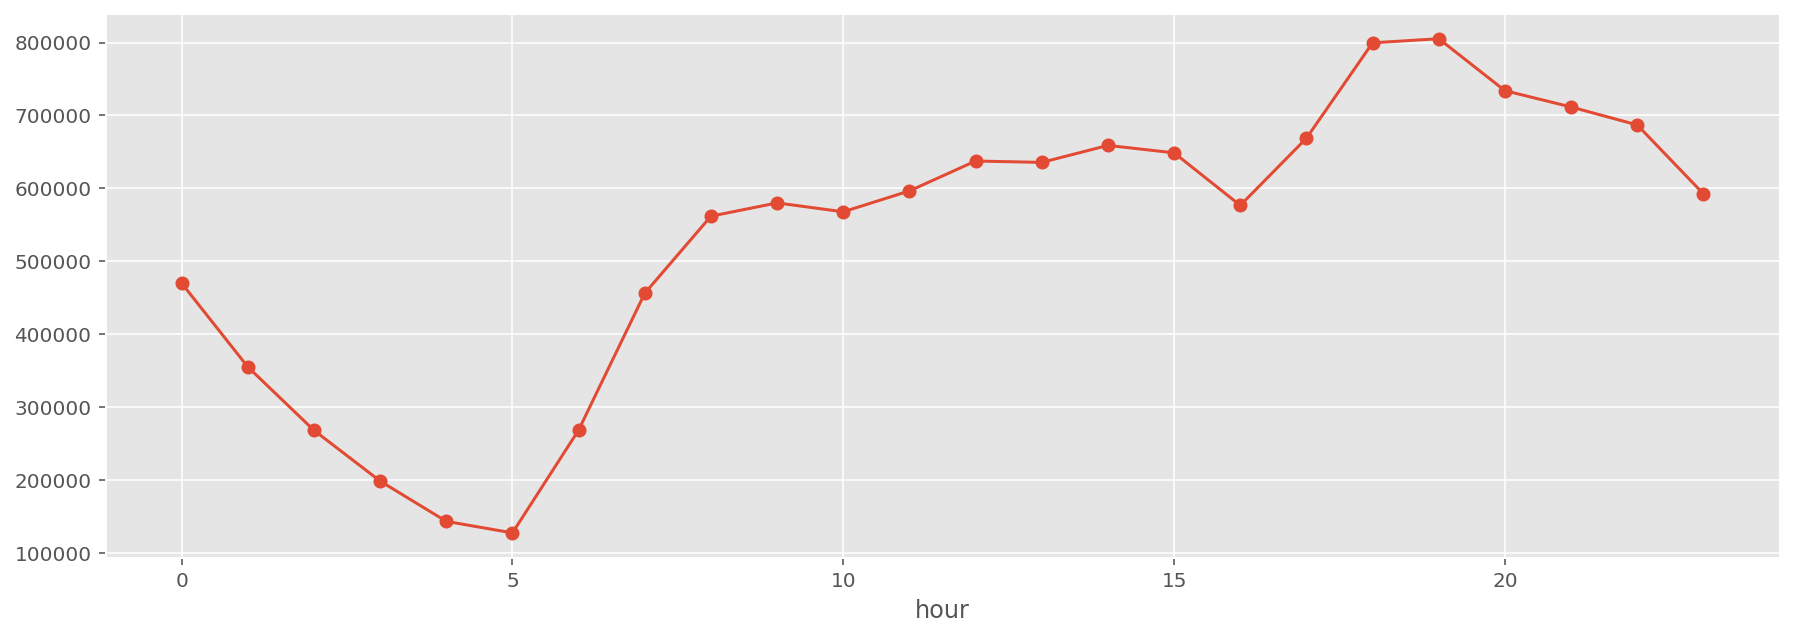

In [52]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y='cnt', kind='line', style="-o", figsize=(15,5));

In [53]:
## Peak : 18-19
## off-peak : 5

In [54]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()

weekday         0         1         2        3        4        5         6
hour                                                                      
0         8552.75   6719.25   8787.00  14326.4  14054.2  25487.2  26099.00
1         5360.50   3707.00   5283.25  11440.4   8785.6  21118.6  22754.75
2         3675.25   2361.75   3337.75   8753.6   5856.8  16382.0  18918.00
3         2730.00   1504.00   2307.00   7030.2   3948.6  12112.0  14226.50
4         2691.25   1633.75   2297.25   5444.8   3341.8   7730.4   8549.25
5         4134.25   3159.00   4057.75   5198.2   4150.0   3911.8   3933.25
6        10065.25   8757.25  11587.00  10925.0  10476.0   4775.6   3983.50
7        16805.75  15820.50  21199.25  18754.0  18194.6   6866.8   5437.00
8        20491.50  19087.25  25219.00  21822.0  21141.8  10864.2   8367.75
9        19523.75  17816.50  23168.50  20452.4  20887.2  16092.6  12709.50
10       17472.00  15789.25  19927.25  18513.0  19261.4  19139.8  17623.25
11       17686.50  15787.25  19353.50  18655.8  19461.6  22176.2  20931.75
12       18895.50  16485.50  19966.50  20012.2  20504.8  24463.2  22797.00
13       18992.00  16207.50  19705.75  19665.6  20420.8  24672.0  23043.50
14       19236.25  17799.00  21159.25  21190.2  22205.4  23745.2  22601.25
15       18196.00  17957.25  20797.50  21120.2  21371.6  24556.4  21411.00
16       15692.50  16034.00  18004.75  17873.0  18450.8  22746.0  20581.00
17       17700.25  19508.75  22432.25  21493.8  22978.8  24729.8  21053.25
18       20559.00  24636.75  28379.25  26537.0  28569.0  28580.8  21713.25
19       19470.75  24012.00  29024.75  27292.6  30551.4  29679.6  19395.50
20       17094.00  22860.25  26898.50  26051.6  28076.0  25360.0  17275.75
21       15598.50  22501.75  26550.75  25974.4  27044.2  24953.2  15779.00
22       13167.25  19352.00  24384.25  24652.2  28099.0  27495.2  14528.25
23        9427.00  13983.00  17168.75  20464.0  27606.0  28303.0  12062.25

In [55]:
df.groupby(['hour','weekday'])['cnt'].mean().unstack().iplot()

In [56]:
df[['cnt','hour','weekday']].pivot_table('cnt', index='hour', columns='weekday', aggfunc='mean').iplot(kind='scatter')

In [57]:
# trip number by weekday
df.groupby('weekday')[['cnt']].mean().iplot(kind='bar')

In [58]:
### trip number by weekday/weekend
df['is_weekend']=((pd.DatetimeIndex(df.index).dayofweek) // 5 ==1).astype(int)

In [59]:
df.groupby(['hour','is_weekend'])['cnt'].mean().unstack().iplot()

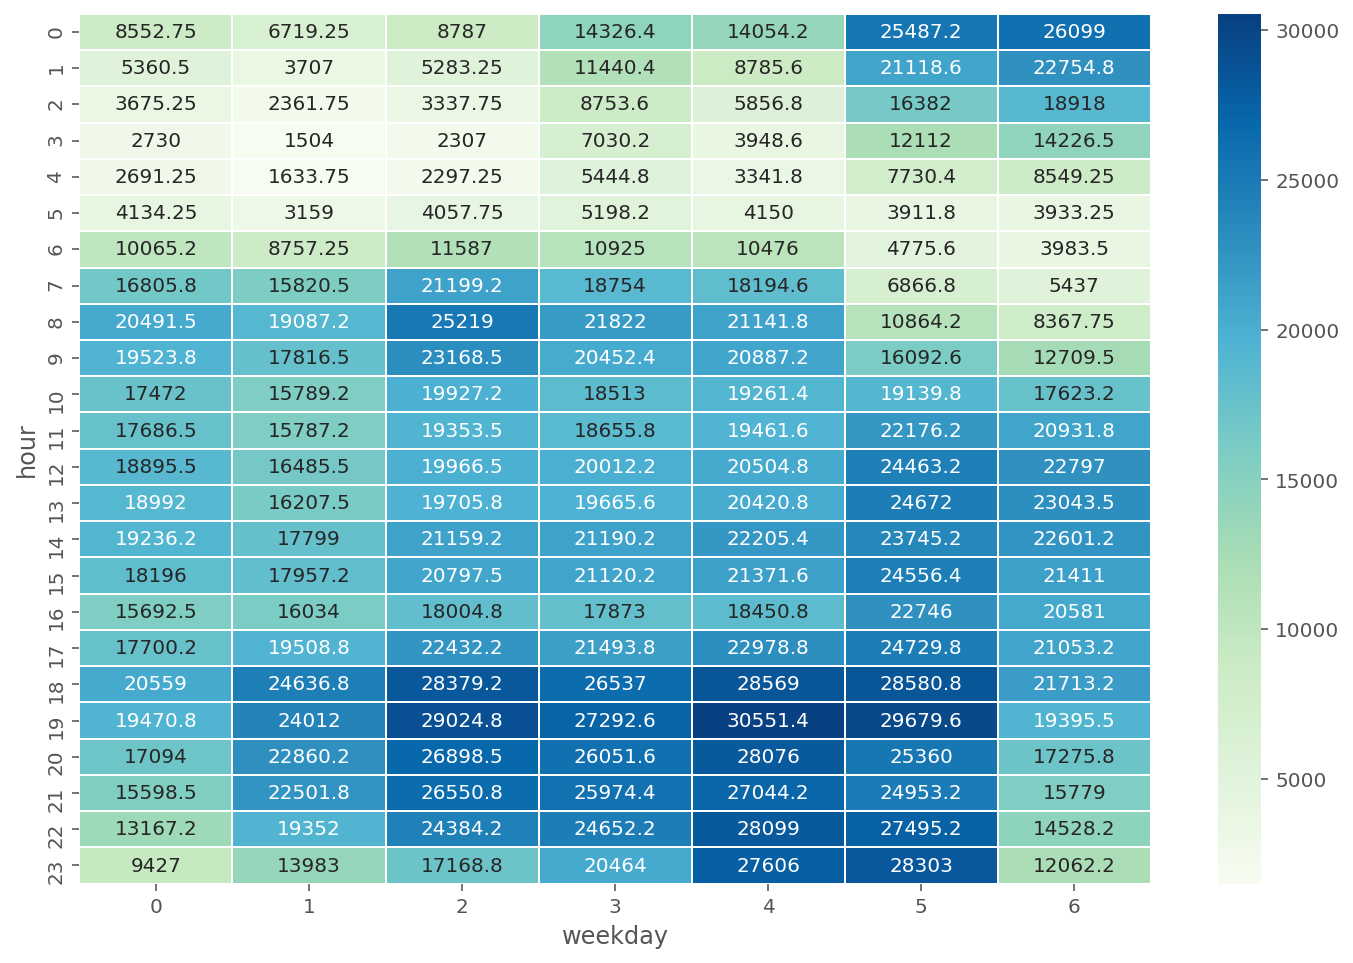

In [60]:
## heatmap by day and time

plt.figure(figsize=(12,8))
sns.heatmap(df.groupby(['hour','weekday'])['cnt'].mean().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});

In [62]:
# the number of calls increased from friday afternoon
average_df = df.groupby(['is_weekend','hour']).mean()['cnt'].unstack(level=0).rename(columns={0:"weekday", 1:"weekend"})

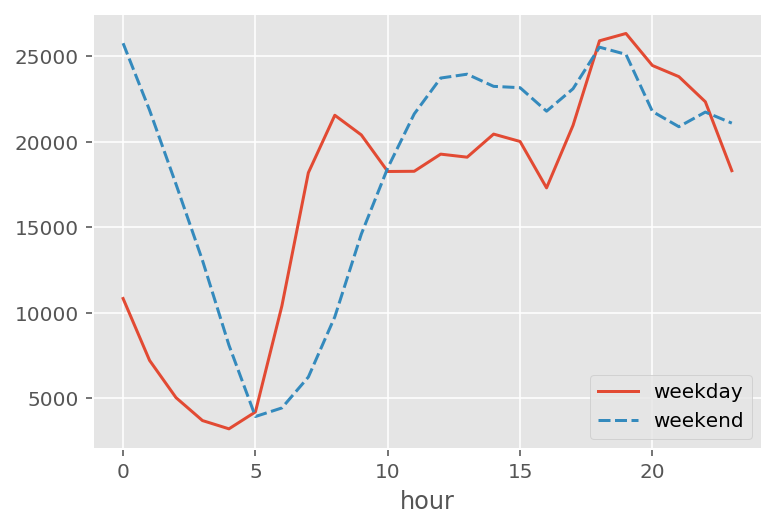

In [63]:
sns.lineplot(data=average_df);

In [64]:
df.head(3)

cnt        date  weekday  hour  weeknum  is_weekend
pickup_hour                                                               
2015-01-01 00:00:00  28312  2015-01-01        3     0        1           0
2015-01-01 01:00:00  31707  2015-01-01        3     1        1           0
2015-01-01 02:00:00  28068  2015-01-01        3     2        1           0

In [69]:
data = df.groupby(['weekday', 'hour']).mean()['cnt'].unstack(level=0).reset_index()
data = data.melt(id_vars="hour", value_name='cnt')

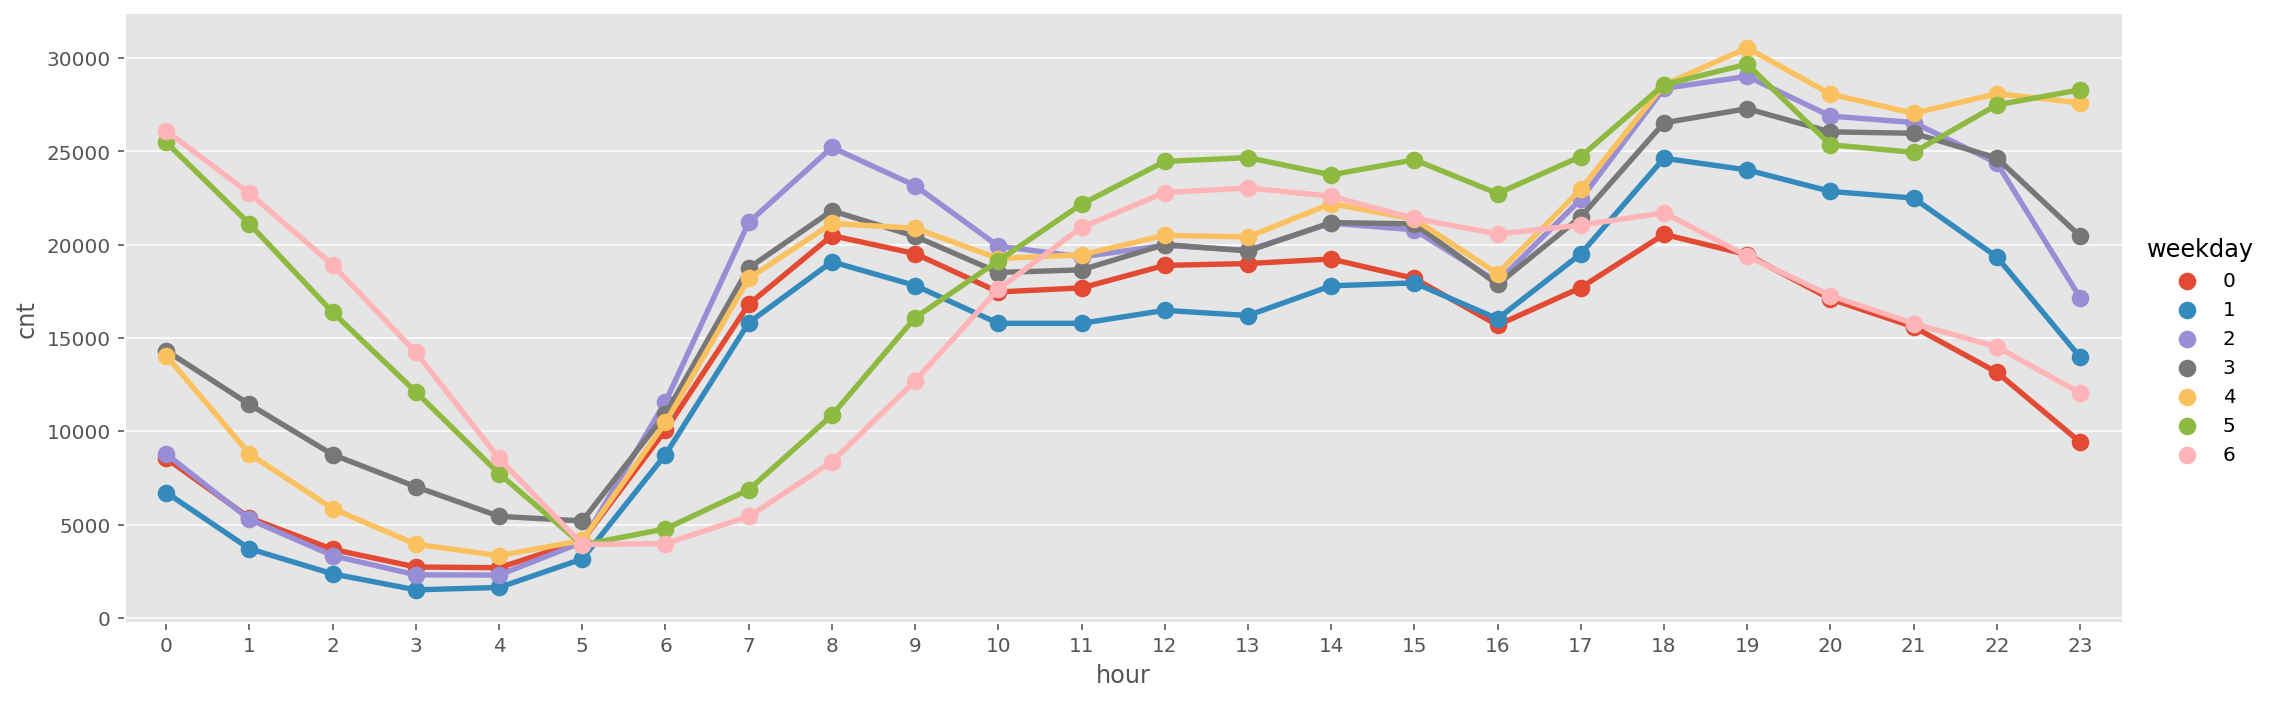

In [70]:
sns.factorplot(x="hour", y="cnt", hue="weekday", data=data, height=5, aspect=3);

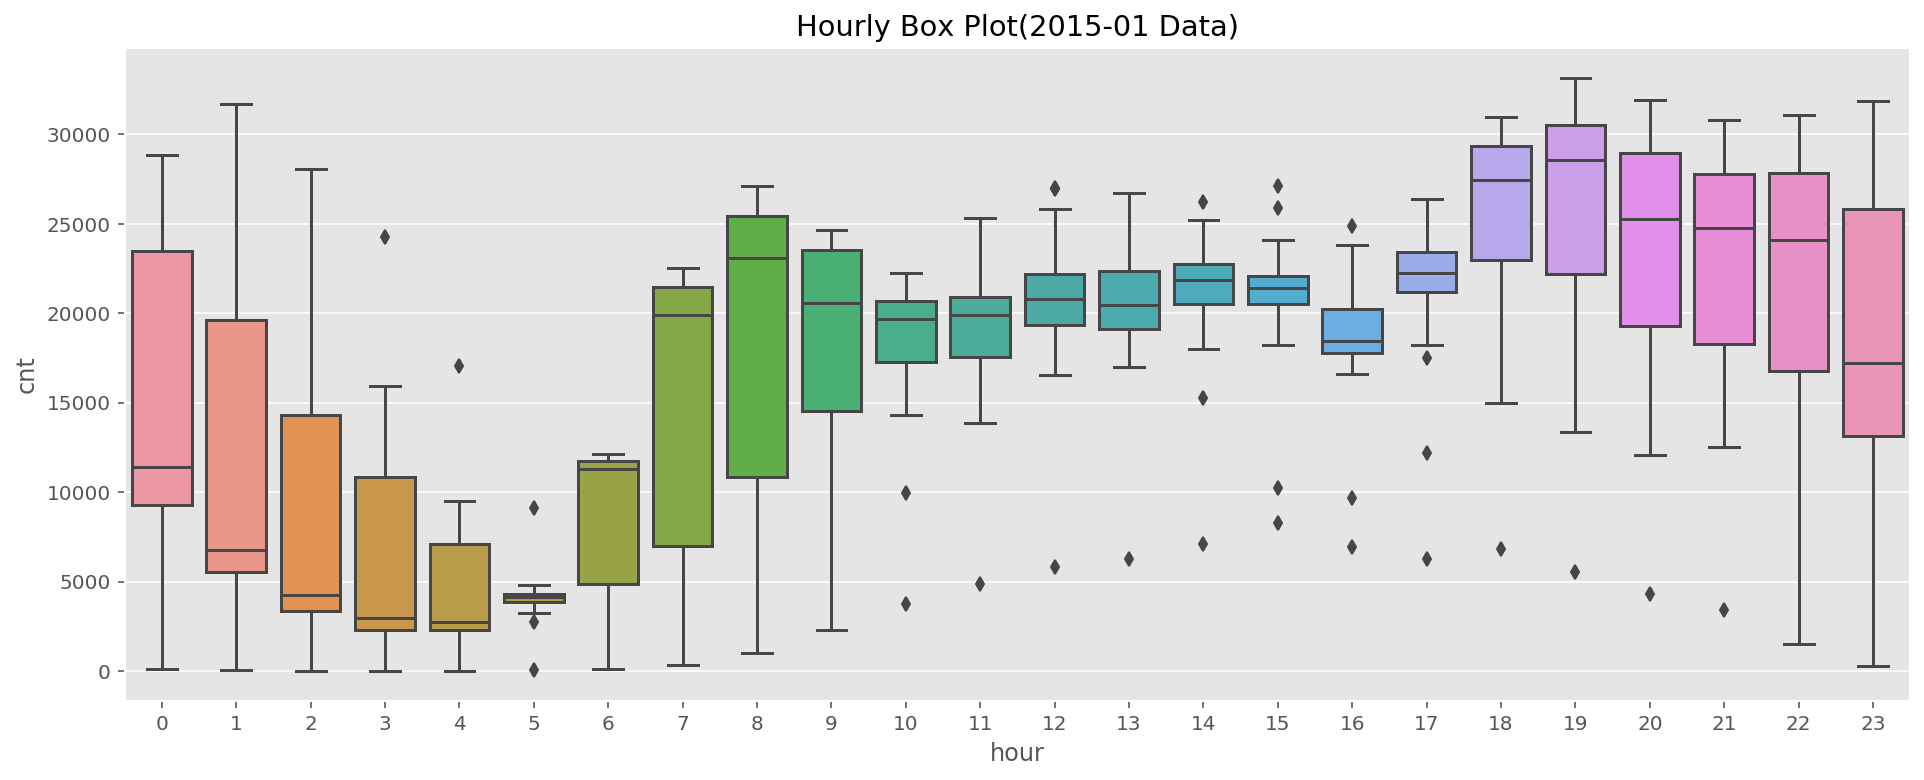

In [71]:
#####Boxplot

plt.figure(figsize=(16,6));
sns.boxplot(x='hour', y='cnt', data=df);
plt.title("Hourly Box Plot(2015-01 Data)");

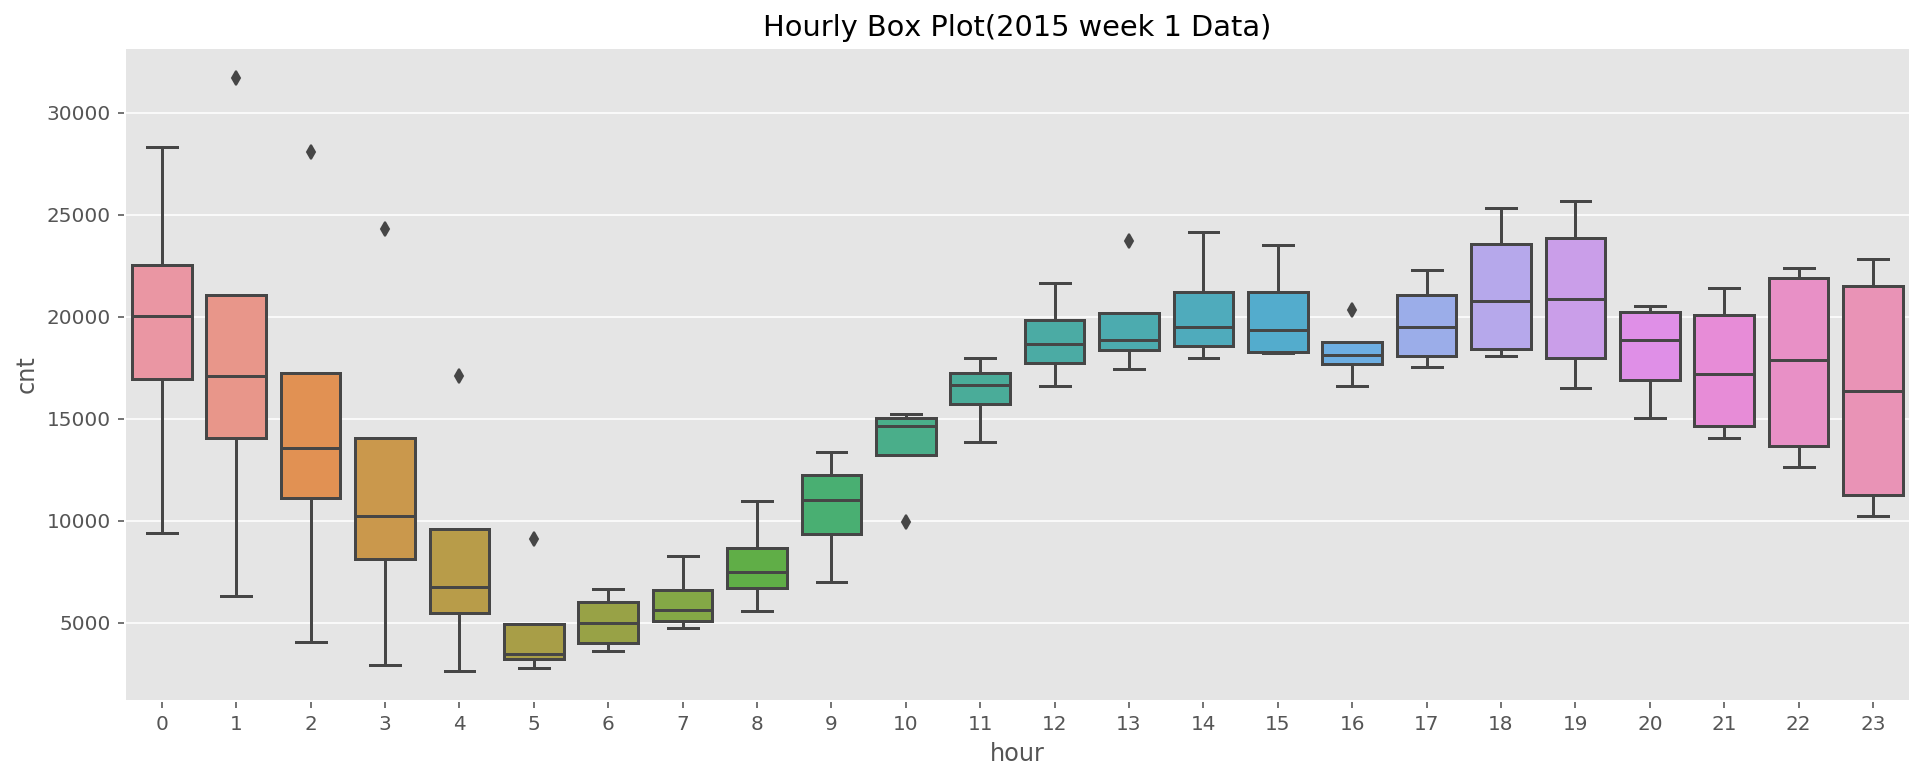

In [73]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==1]);
plt.title("Hourly Box Plot(2015 week 1 Data)");

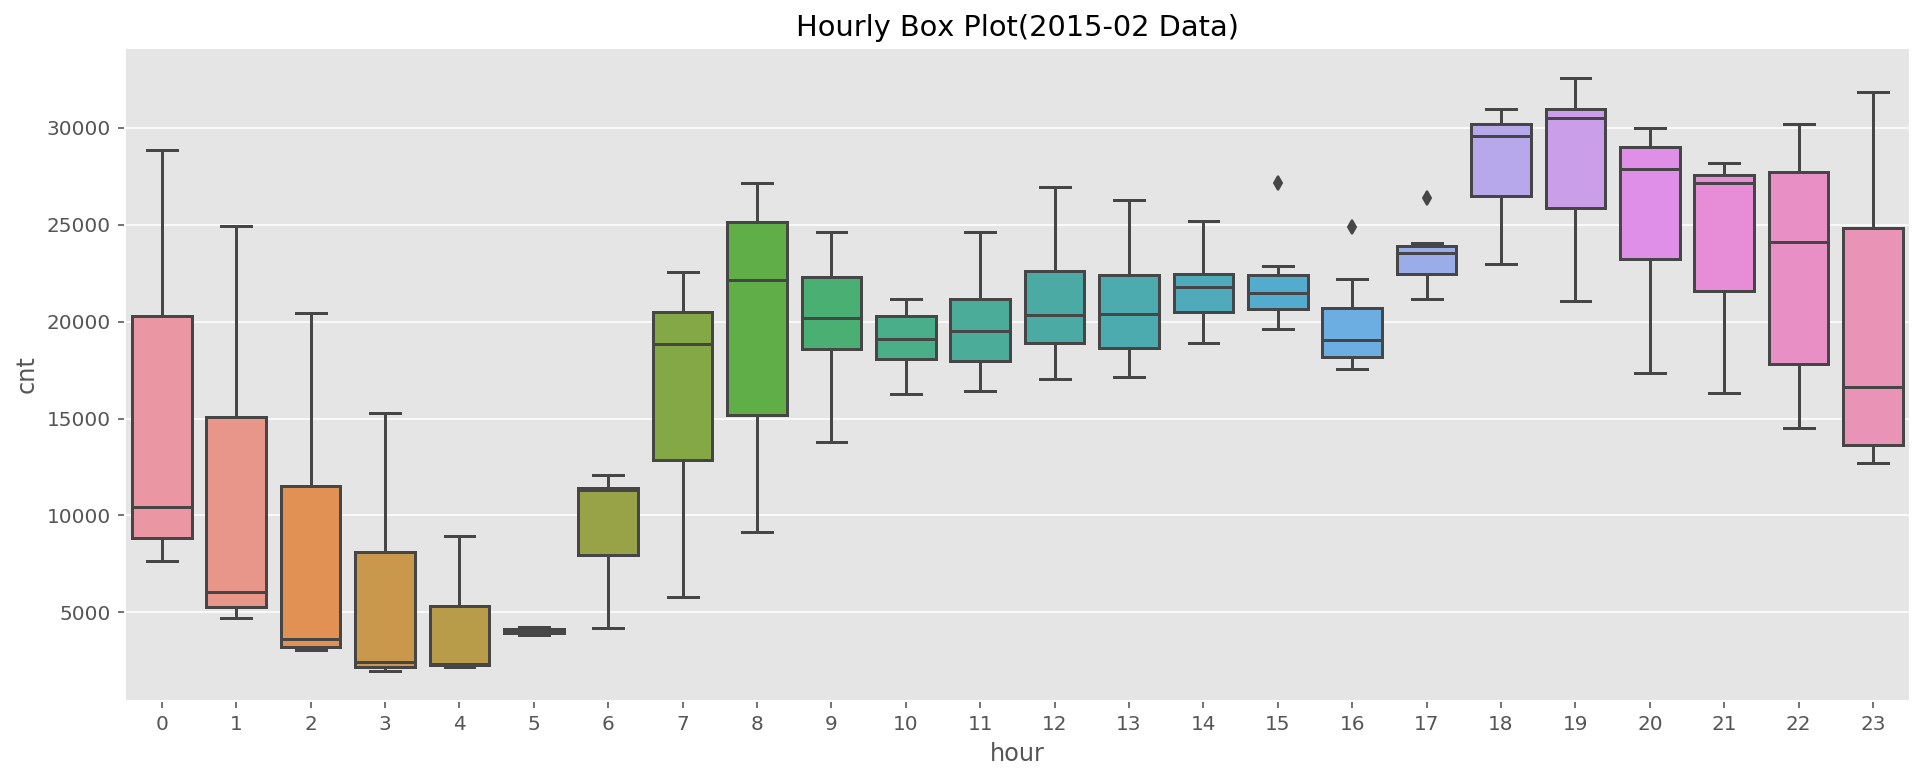

In [74]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==2]);
plt.title("Hourly Box Plot(2015-02 Data)");

In [75]:
def visualize_hourly_boxplot_by_weeknum(df, y, weeknum):
    plt.figure(figsize=(16, 6));
    sns.boxplot(x='hour', y=y, data=df[df['weeknum']==weeknum]);
    plt.title(f"Hourly Box Plot(2015-{weeknum:02} Data)");

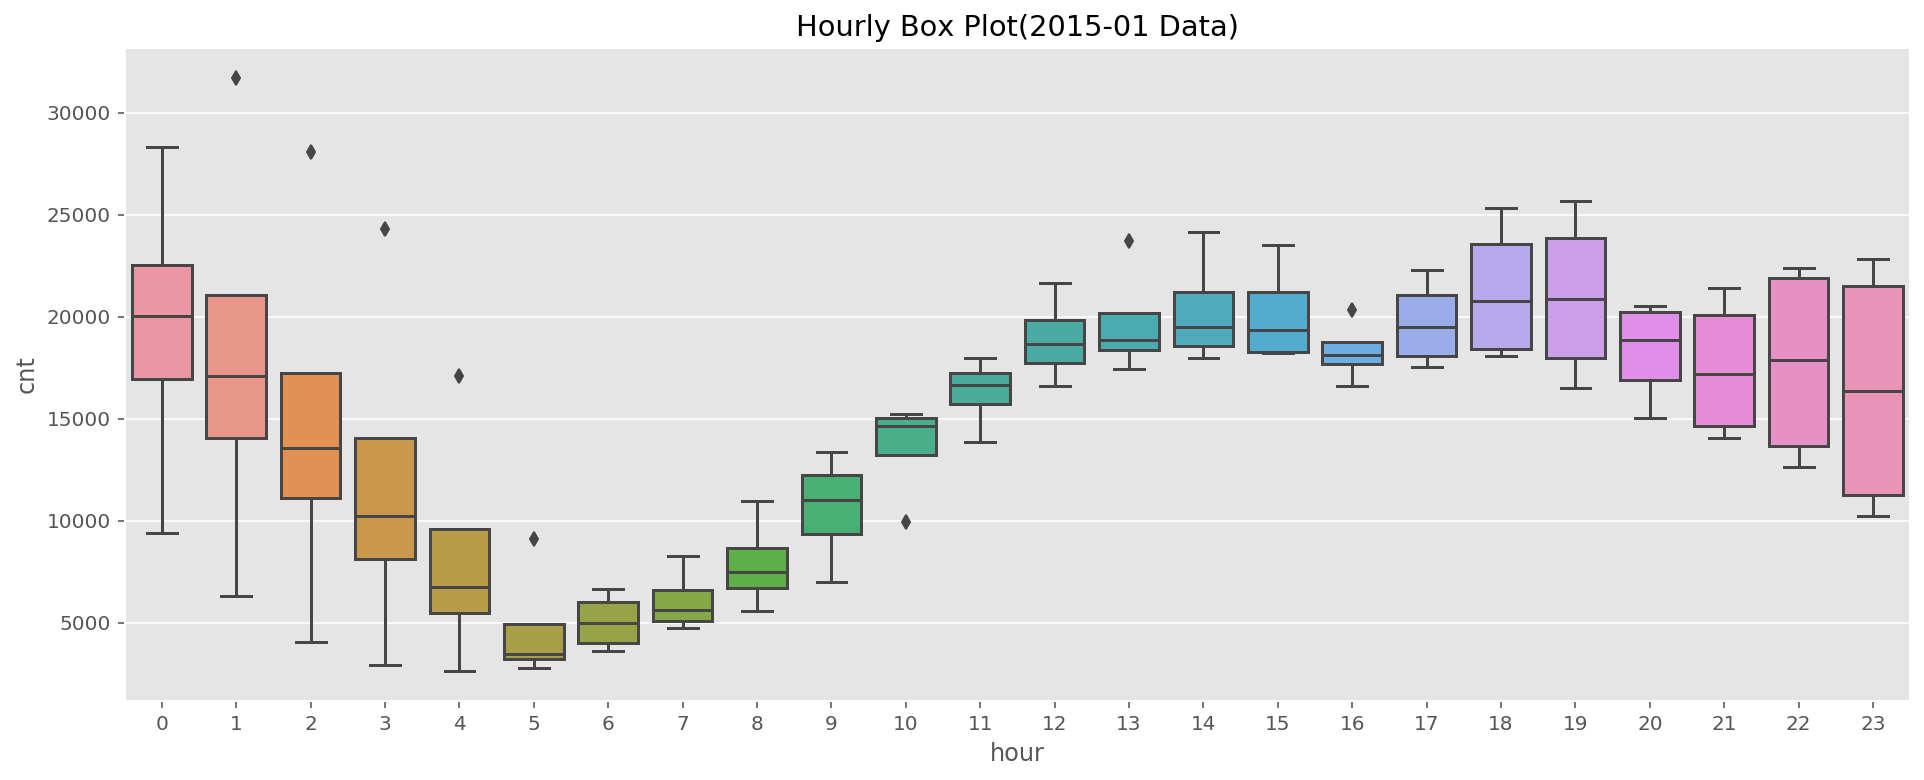

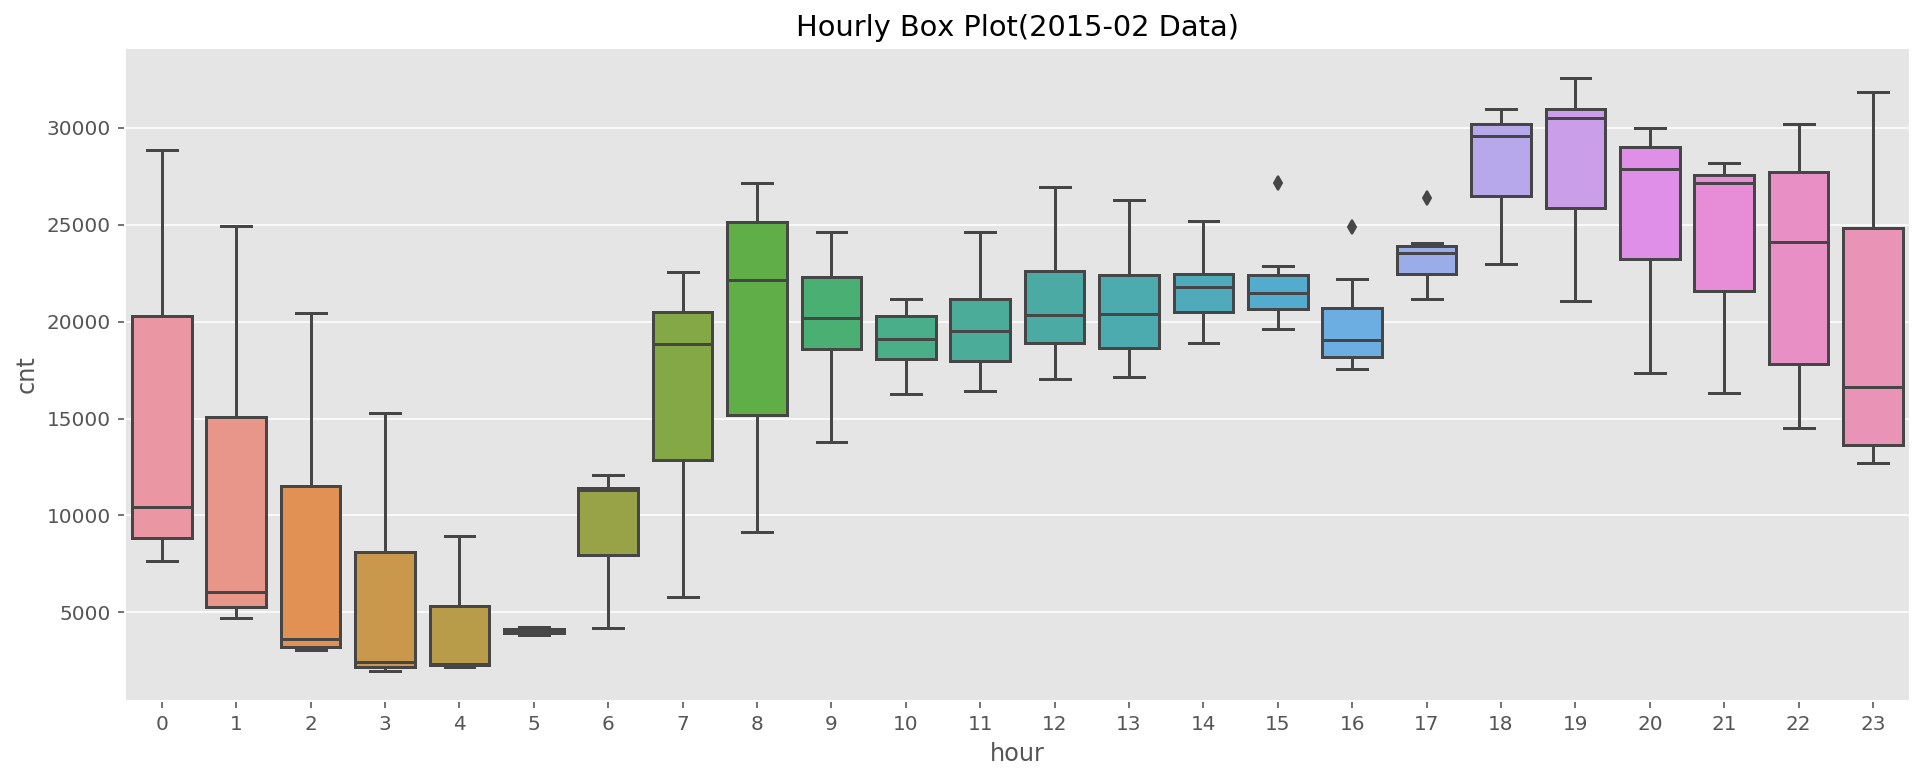

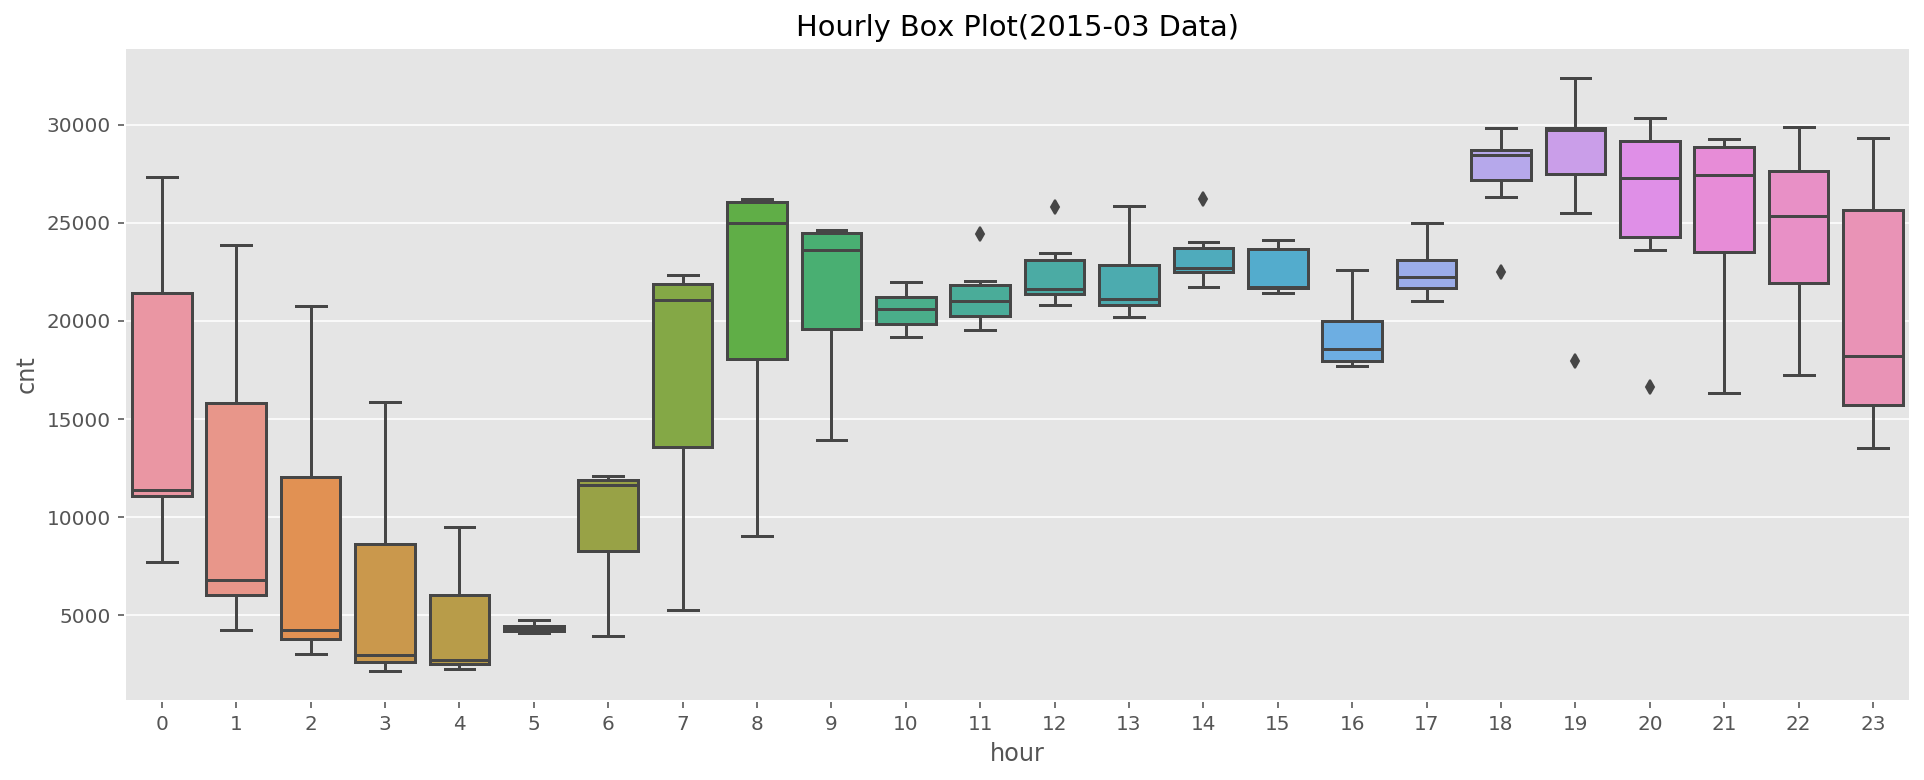

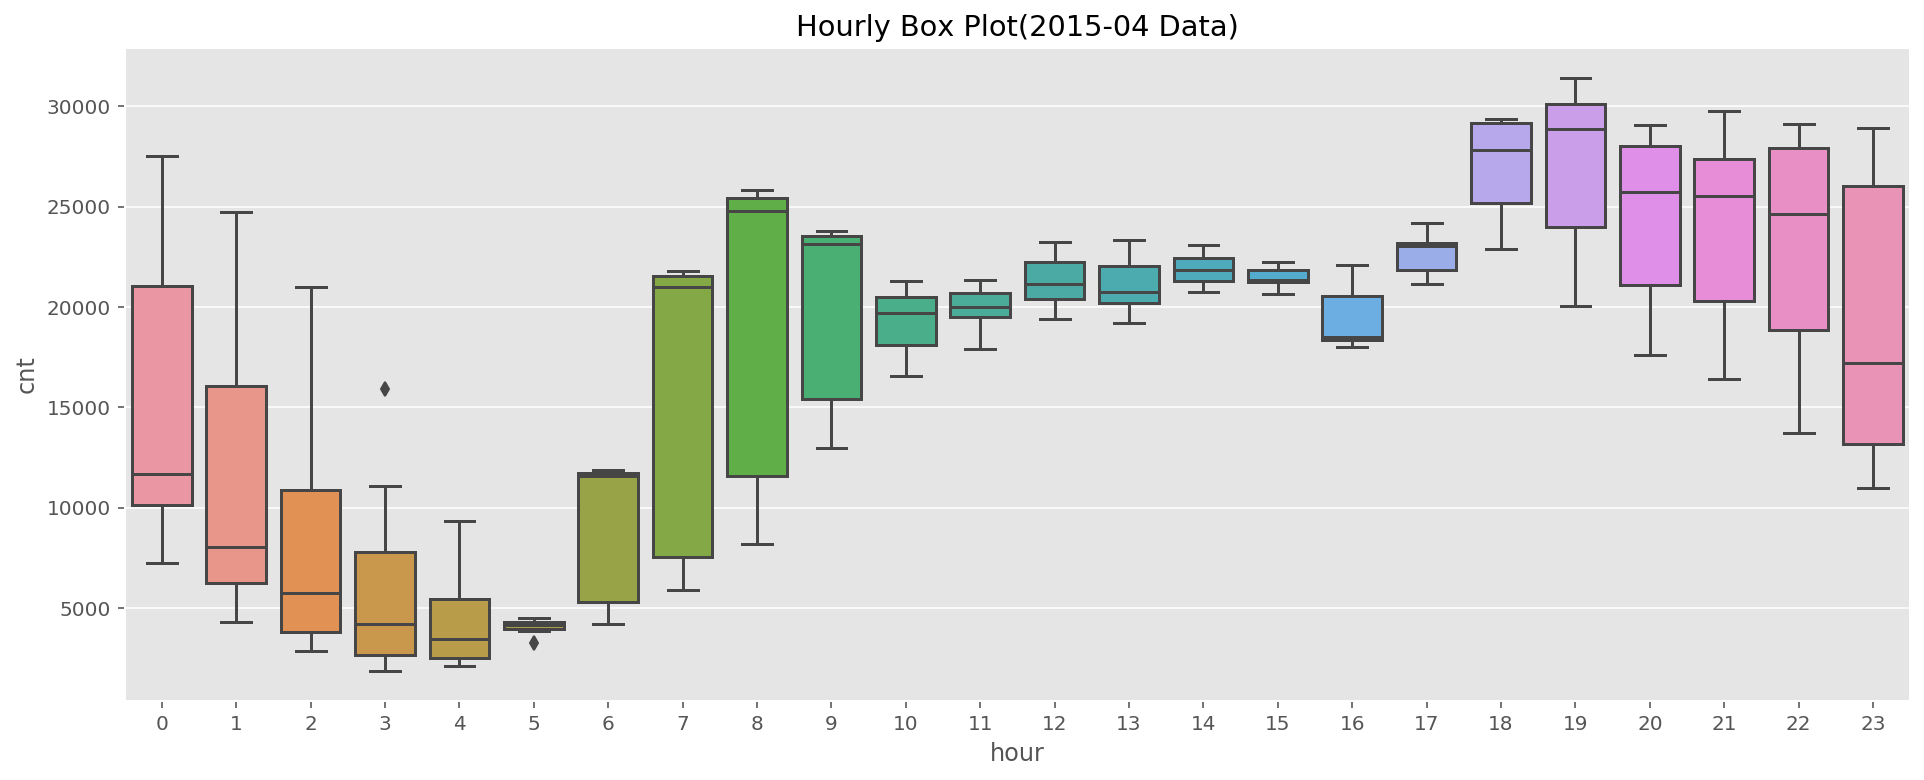

In [76]:
for week in range(1, 5):
    visualize_hourly_boxplot_by_weeknum(df, 'cnt', week)

In [78]:
####Violin plot

weekday_dict = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

In [79]:
def visualize_violinplot_by_weekday(df, y, weekday):
    plt.figure(figsize=(16, 6));
    sns.violinplot(x="hour", y=y, hue="weekday", 
                   data=df[df['weekday'] == weekday][['hour', 'weekday', y]],
                   inner="quart");    
    plt.title(f"{weekday_dict[weekday]}'s hourly violinplot {y}(2015-01 Data)")

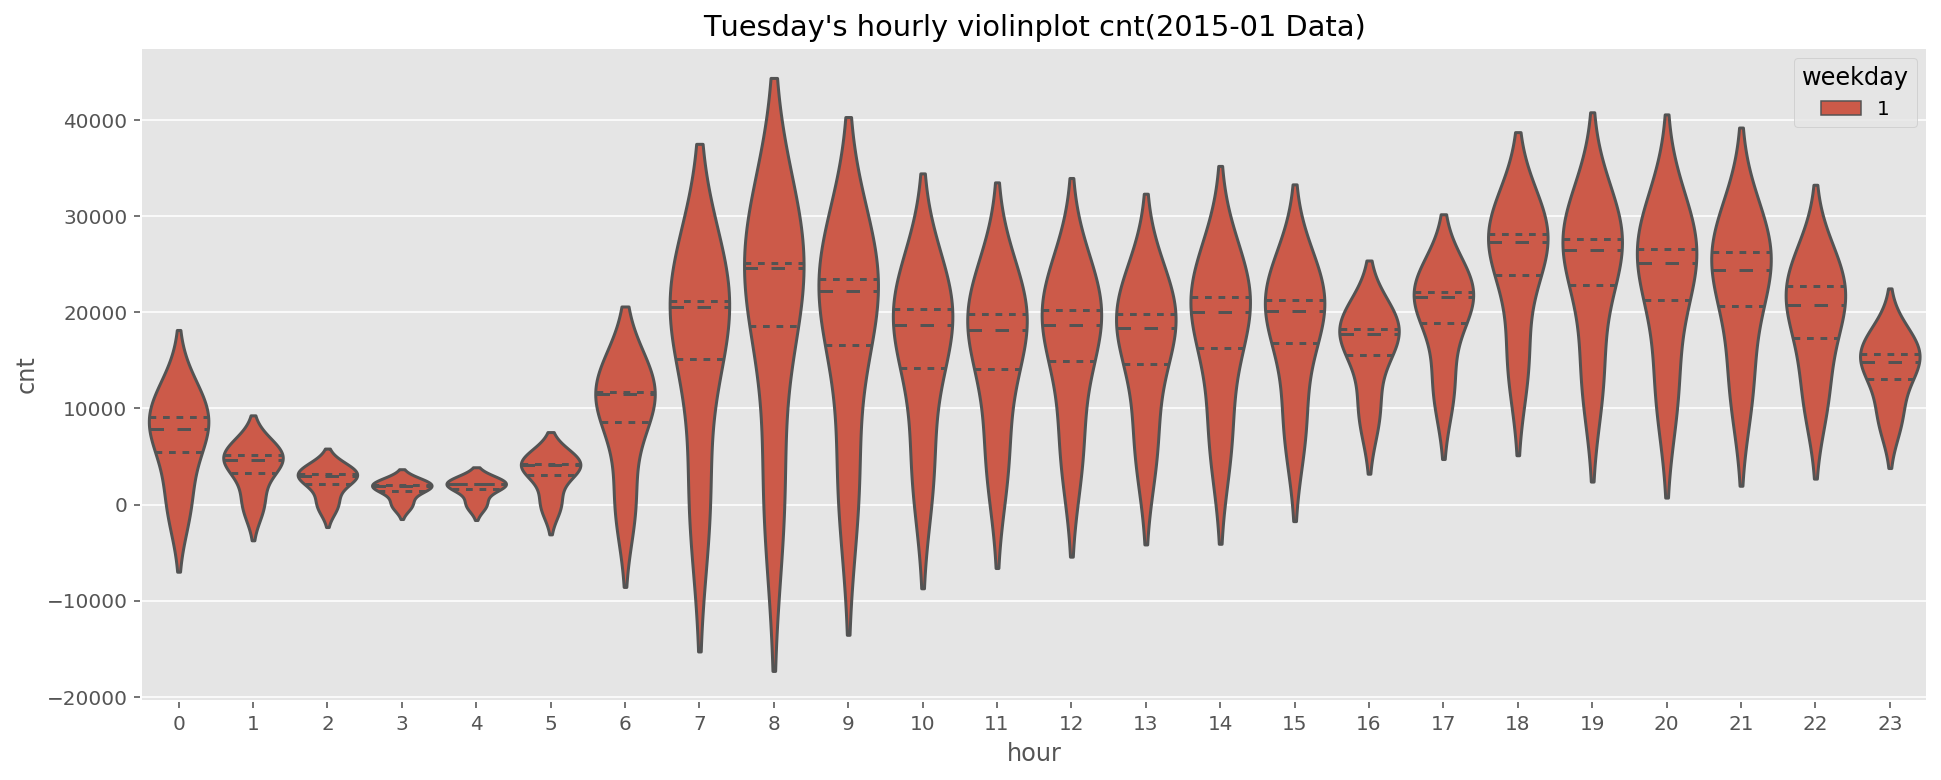

In [80]:
visualize_violinplot_by_weekday(df, 'cnt', 1)

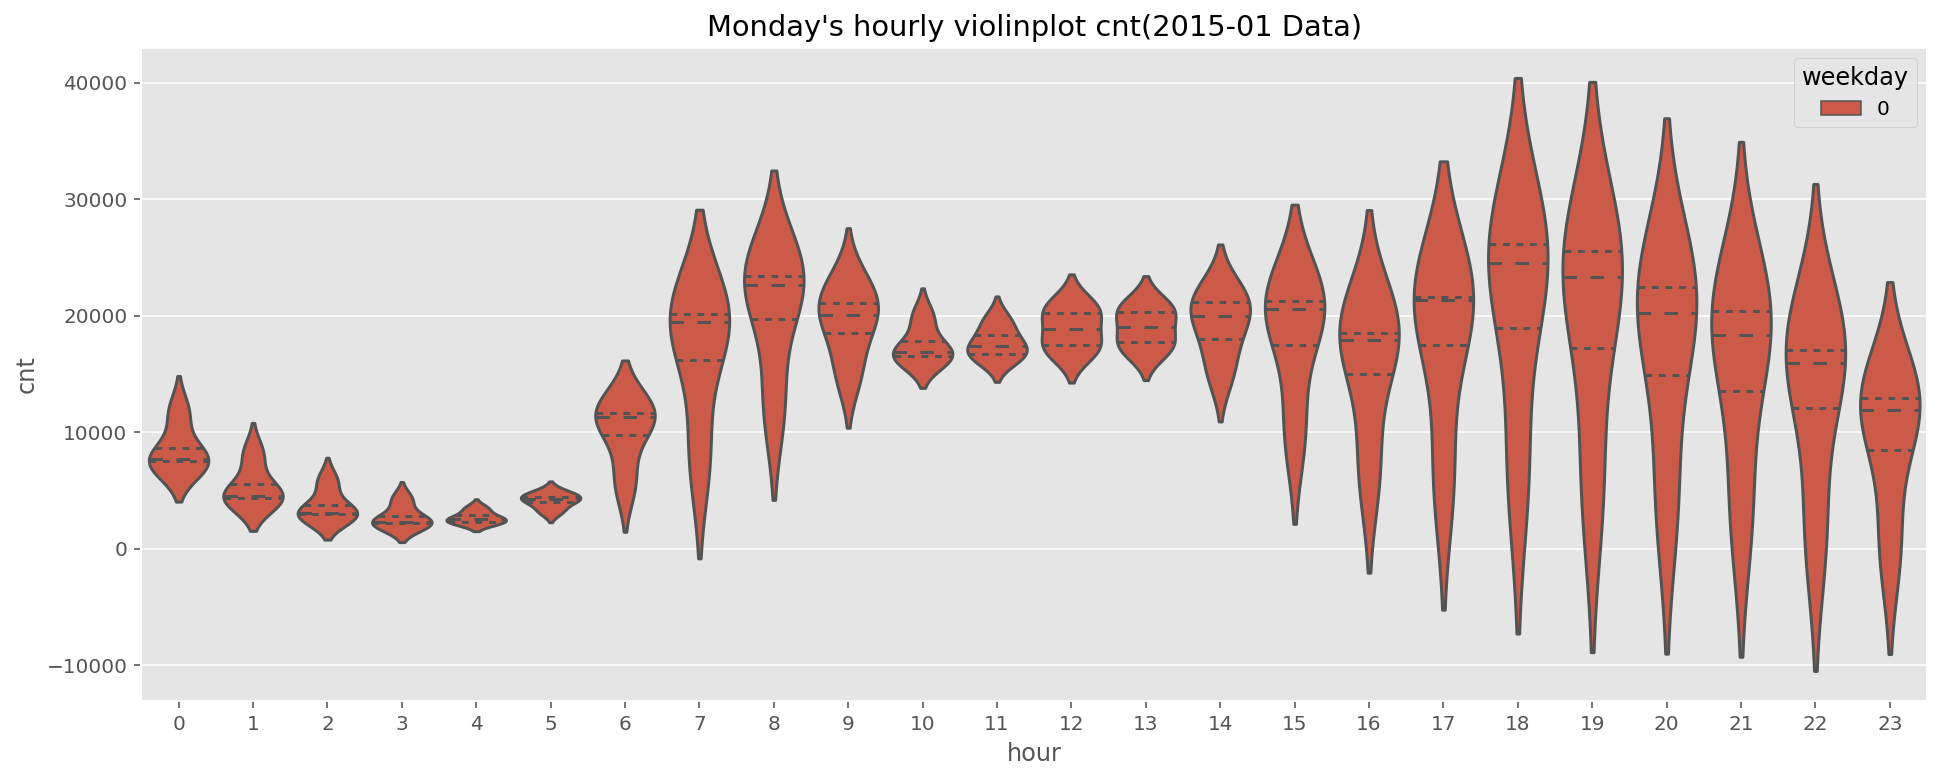

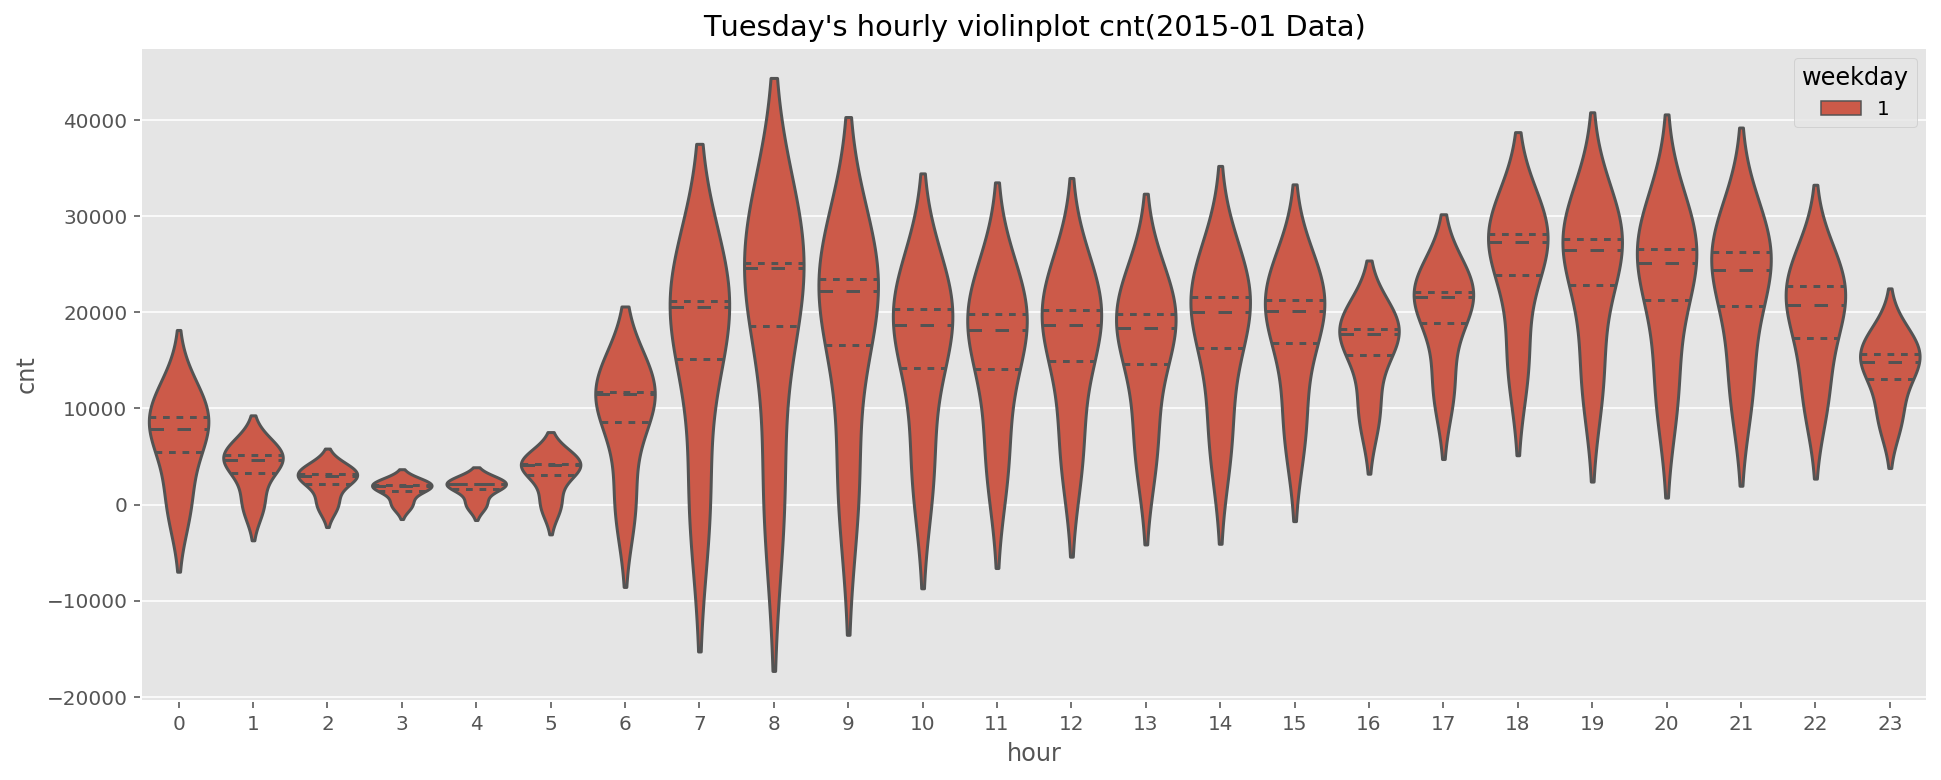

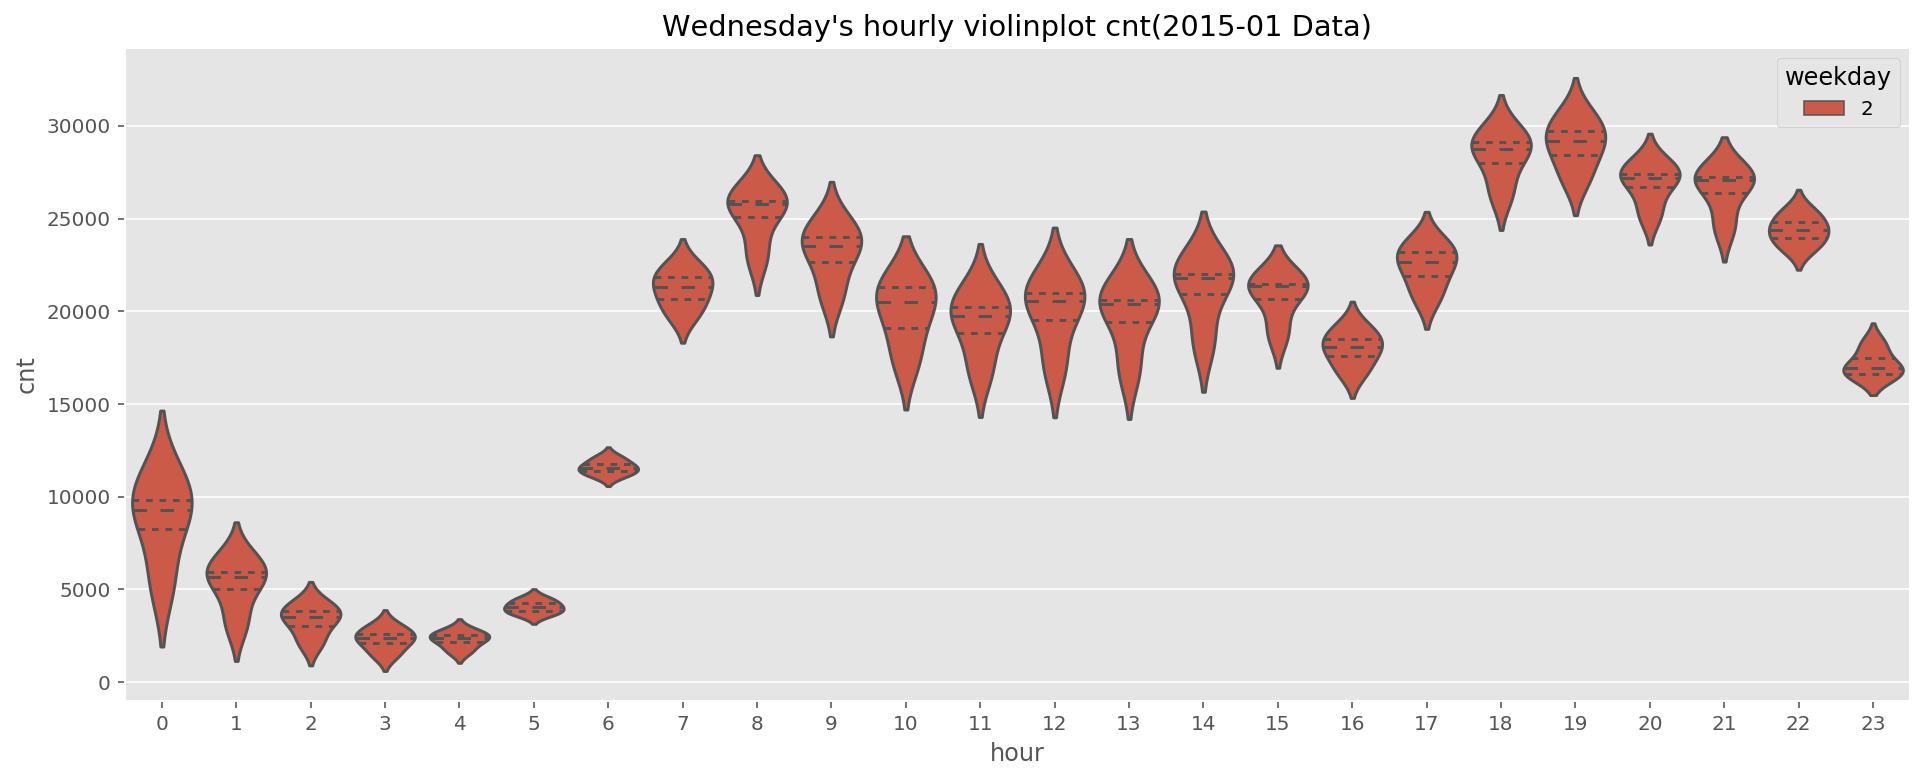

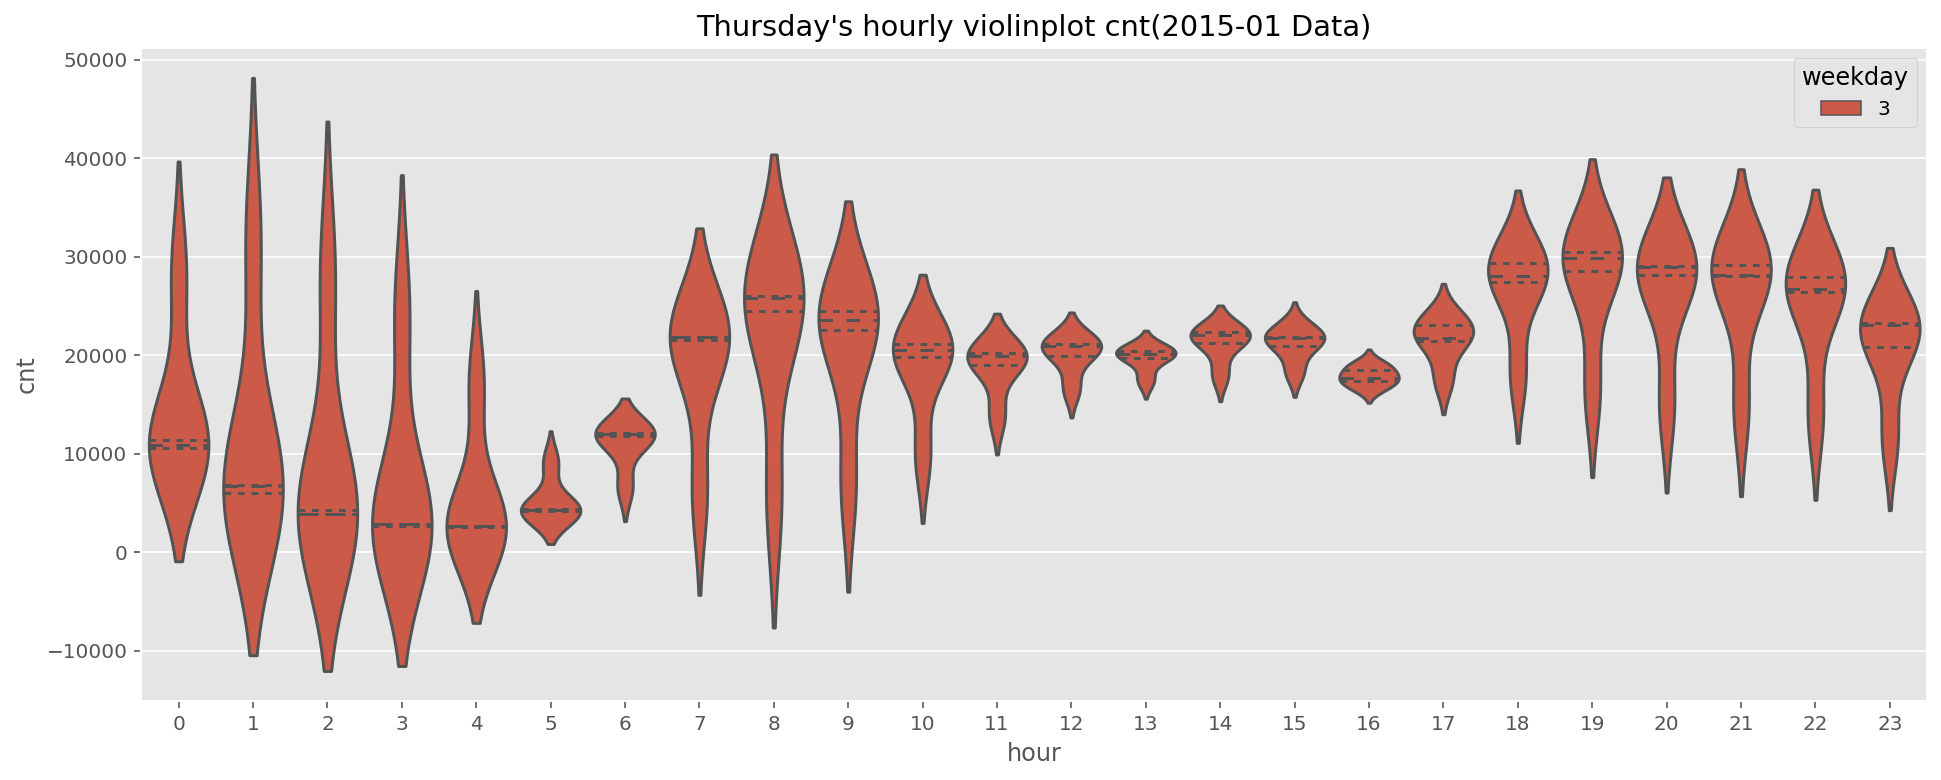

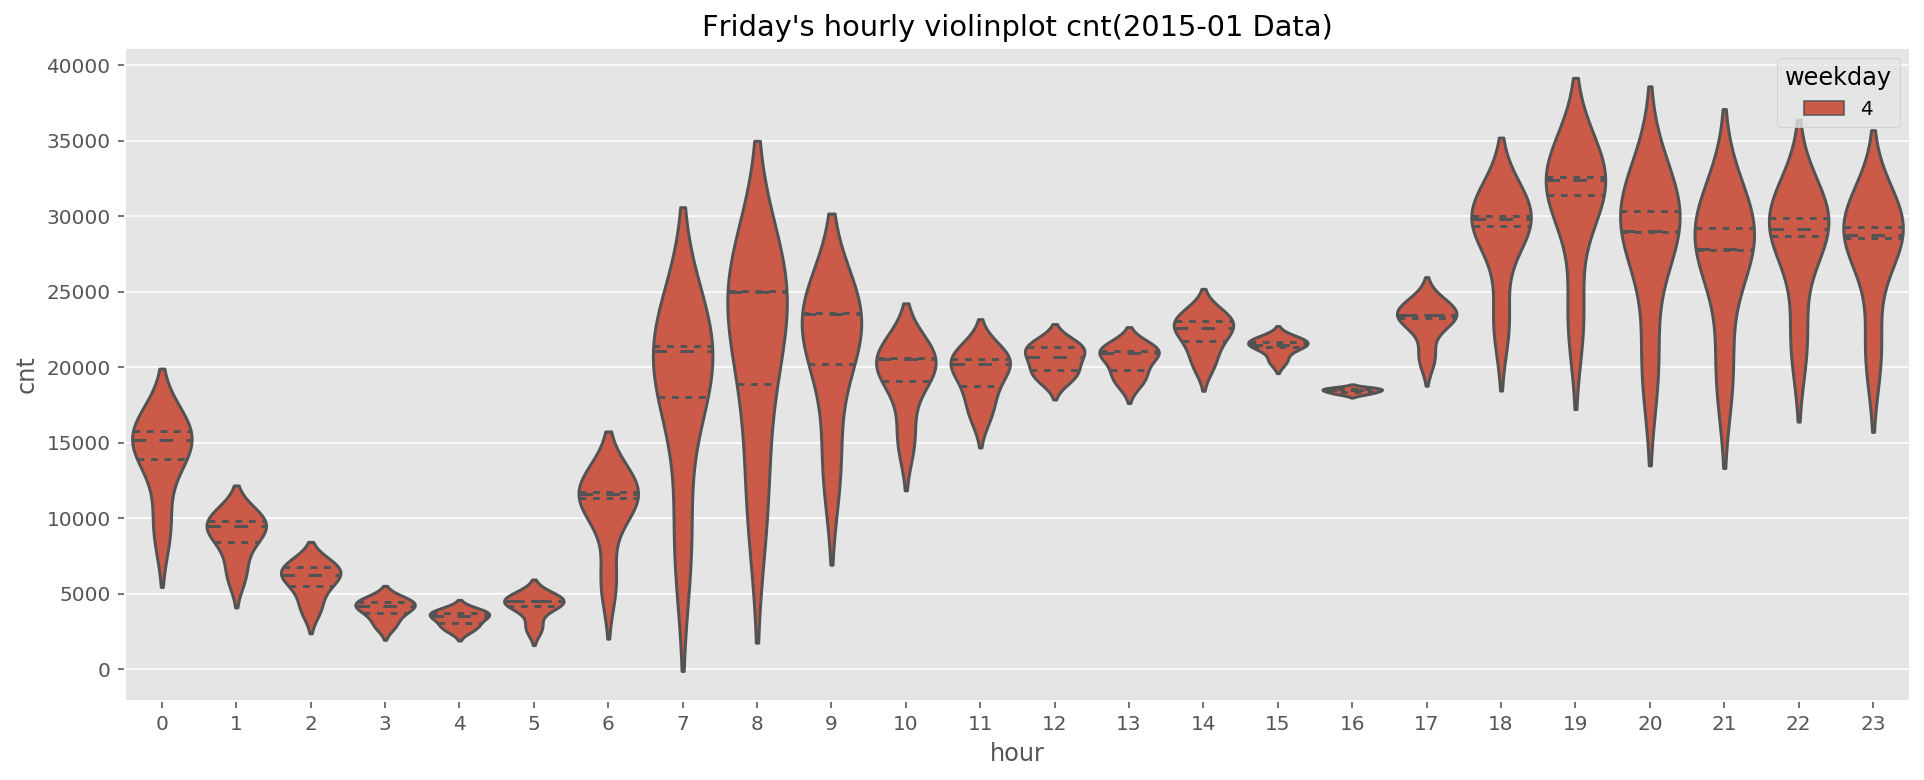

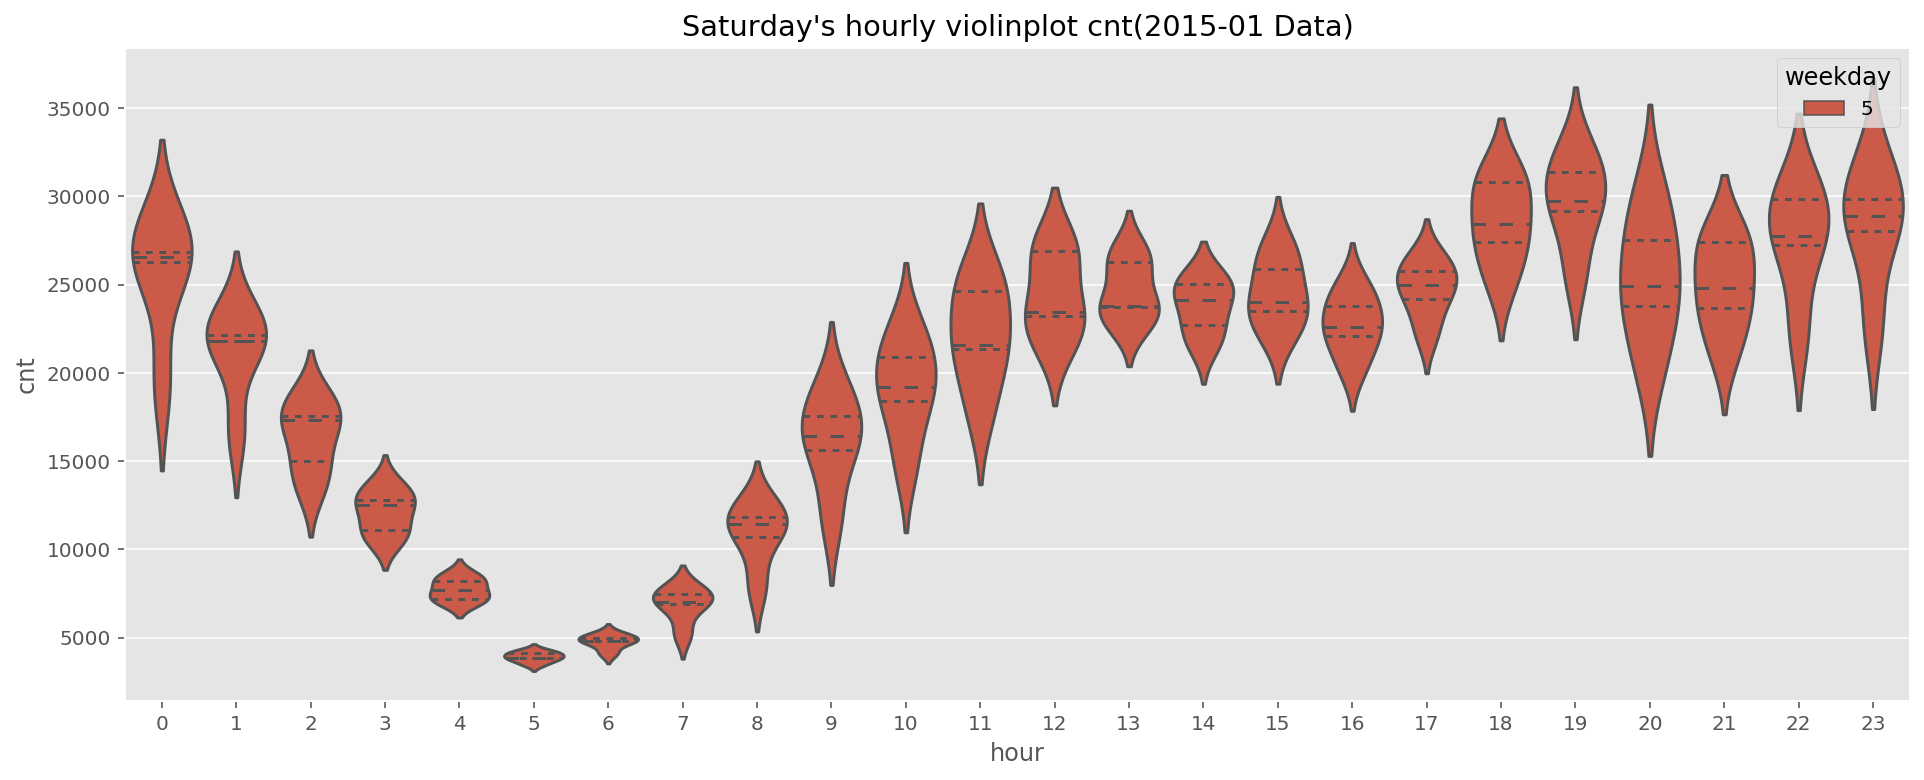

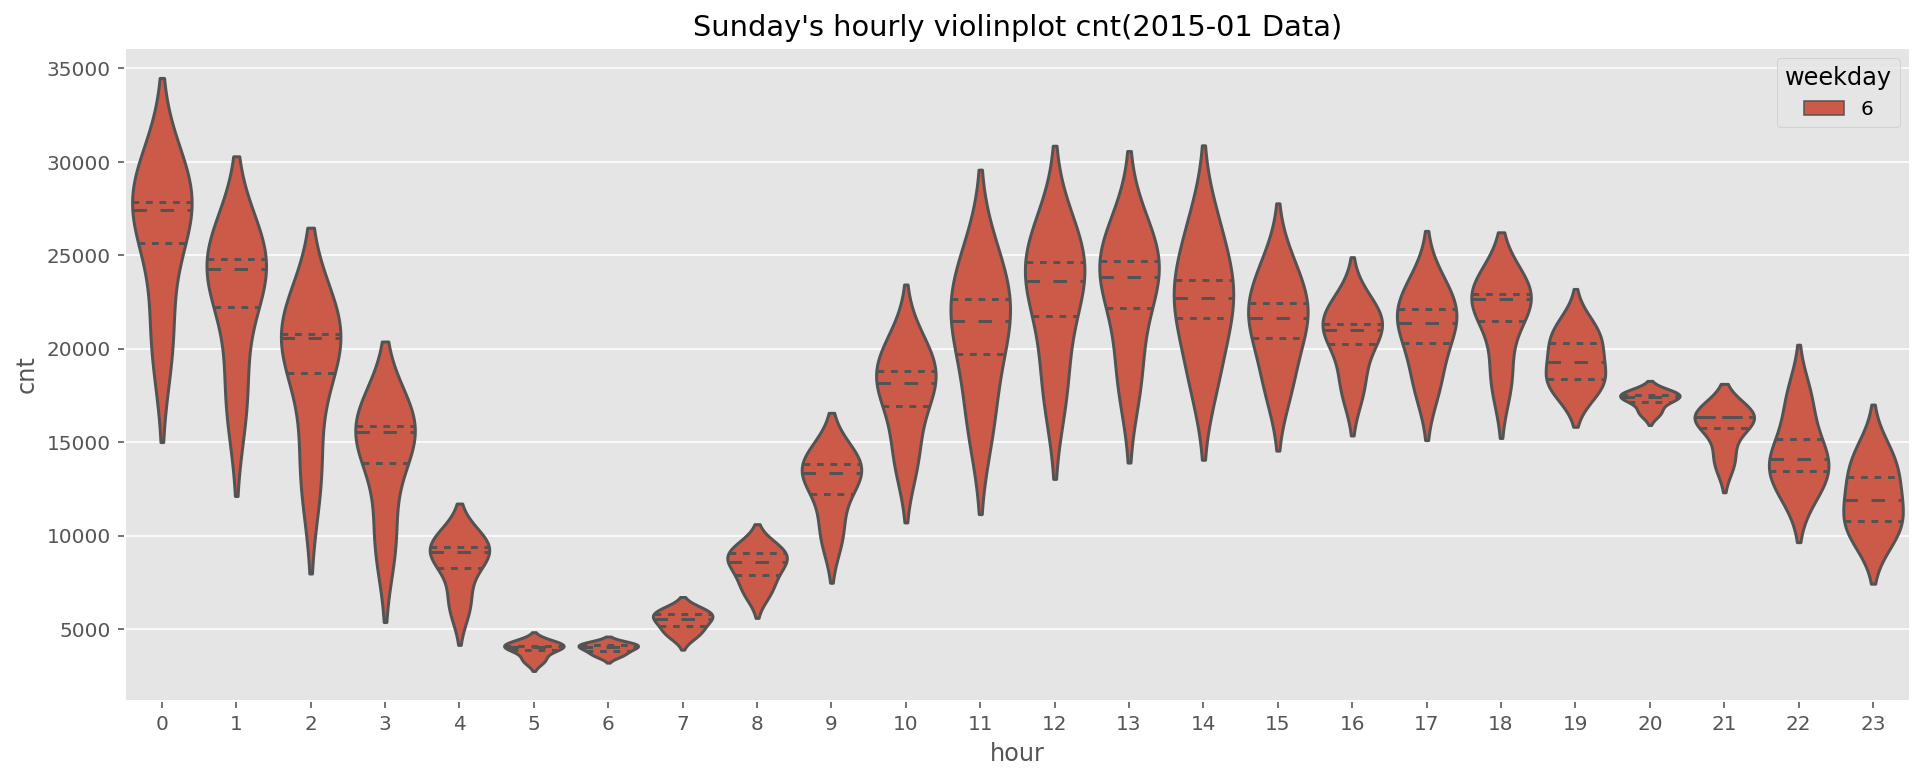

In [81]:
for weekday in range(0, 7):
    visualize_violinplot_by_weekday(df, 'cnt', weekday)

In [89]:
### trip_distance distribution
trip_distance_query = """
SELECT 
     floor(trip_distance/30)*30 as bucket_floor, 
     count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""

trip_distance_query_log = """
SELECT
    floor(trip_distance/30)*30 as bucket_floor,
    log10(count(*)) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""

distance_df = pd.read_gbq(query=trip_distance_query, dialect='standard', project_id='nyctd-294708')
distance_log_df = pd.read_gbq(query=trip_distance_query_log, dialect='standard', project_id='nyctd-294708')

Downloading: 100%|██████████| 57/57 [00:00<00:00, 90.86rows/s]


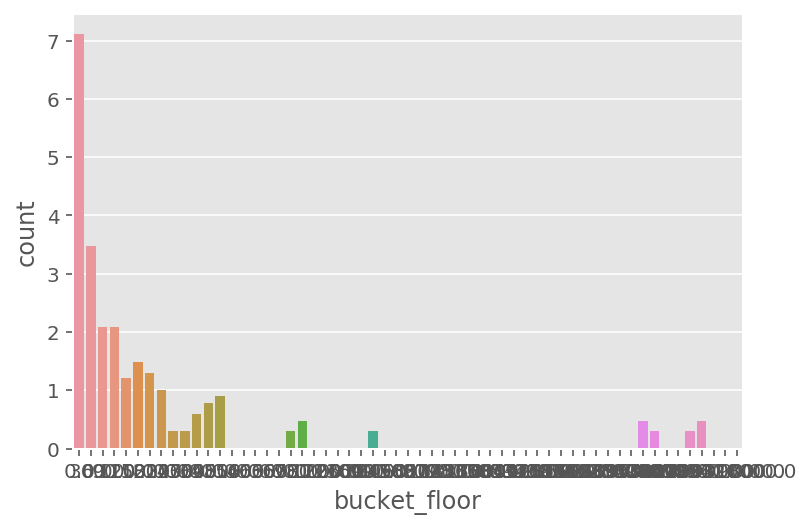

In [90]:
sns.barplot(x=distance_log_df['bucket_floor'], y=distance_log_df['count']);

In [91]:
distance_df.head()

NameError: name 'distnace_df' is not defined

In [92]:
distance_df.set_index('bucket_floor').iplot(kind='bar')

In [95]:
## long distance/short distance demand

short_trip_query = """
SELECT
    EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
    EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
    count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance < 30
GROUP BY pickup_hour, dropoff_hour
"""

short_trip_df = pd.read_gbq(query=short_trip_query, dialect='standard', project_id='nyctd-294708')

Downloading: 100%|██████████| 339/339 [00:00<00:00, 1092.94rows/s]


In [96]:
long_trip_query = """
SELECT
    EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
    EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
    count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance >= 30
GROUP BY pickup_hour, dropoff_hour
"""

long_trip_df = pd.read_gbq(query=long_trip_query, dialect='standard', project_id='nyctd-294708')

Downloading: 100%|██████████| 115/115 [00:00<00:00, 369.57rows/s]


In [97]:
short_trip_df.head(2)

pickup_hour  dropoff_hour   count
0           19            19  653731
1           14            14  511868

In [98]:
long_trip_df.head(5)

pickup_hour  dropoff_hour  count
0           22            22     36
1            6             6     19
2           15            17     47
3           13            13     32
4            9            10     89

In [100]:
trip_df = short_trip_df.merge(long_trip_df, on=["pickup_hour", "dropoff_hour"], suffixes=["_short", "_long"]) \
                       .rename(columns={"count_short":"short_trips", "count_long":"long_trips"})

In [101]:
trip_df.head()

pickup_hour  dropoff_hour  short_trips  long_trips
0           19            19       653731          30
1           14            14       511868          28
2           21            21       575352          37
3            9             9       457809          12
4            5             6        27610          53

In [102]:
trip_df_pickup = trip_df.groupby(["pickup_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="pickup_hour")
trip_df_dropoff = trip_df.groupby(["dropoff_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="dropoff_hour")

In [103]:
trip_df_pickup.head()

pickup_hour  short_trips  long_trips
0            0       469713         146
1            1       354890          94
2            2       267918          89
3            3       198414          59
4            4       143109          62

In [111]:
def plt_clock(ax, radii, title, color):
    N=24
    bottom =2
    
    # theta for 24 hours 
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    
    # bin width 
    width = 2*np.pi / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor = "#999999")
    
    #set the label clockwise and start from the top
    ax.set_theta_direction(-1)
    
    #label setting
    ax.set_xticks(theta)
    ticks=["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [112]:
def diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    # 2, 2 first
    ax = plt.subplot(2,2,1, polar=True)
    
    # each bin historgram for 24 hours
    radii = np.array(trip_df_pickup['short_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    # 2, 2 second
    ax = plt.subplot(2,2,2, polar=True)
    
    # Histogram for 24 hours for each bins
    radii = np.array(trip_df_pickup['long_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

    ax = plt.subplot(2,2,3, polar=True)
    radii = np.array(trip_df_dropoff['short_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,4, polar=True)
    radii = np.array(trip_df_dropoff['long_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

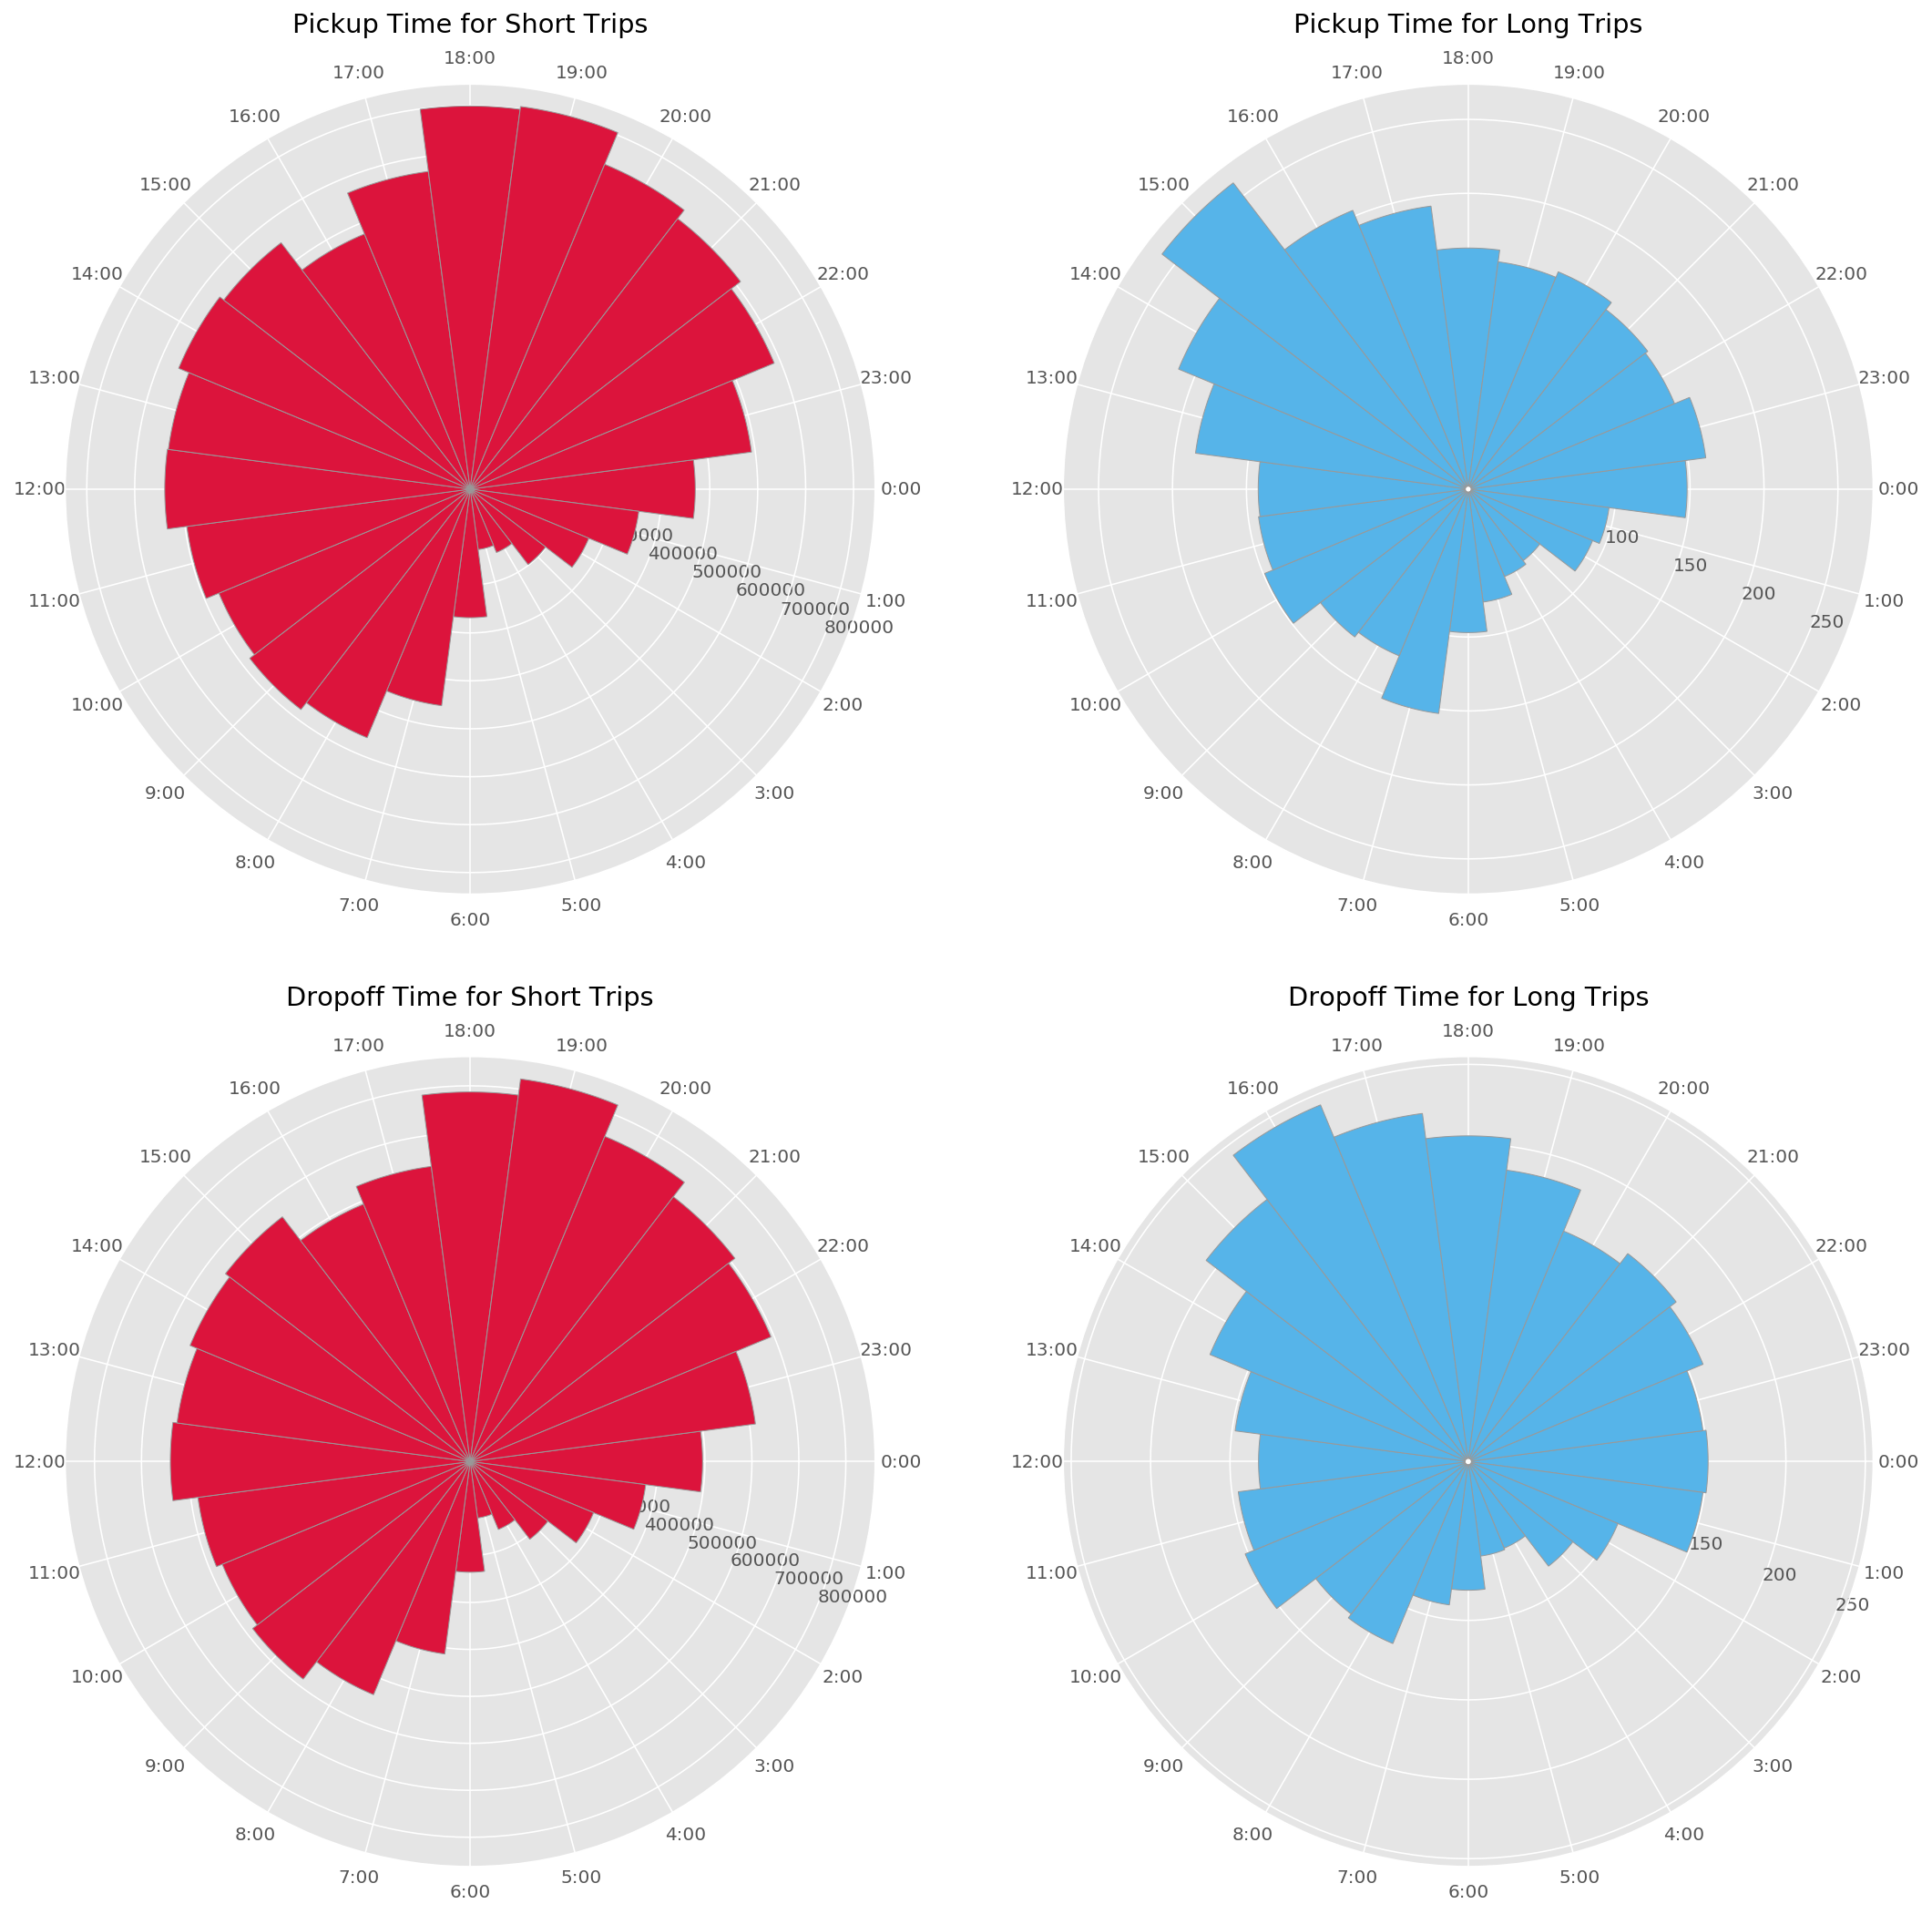

In [113]:
diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff)

In [114]:
###Peak time 
#short trip : 18:00~22:00
#Long trip : 13:00~15:30


In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

PROJECT_ID='nyctd-294708'

In [117]:
###preprocessing

base_query = """
WITH base_data AS 
(
  SELECT nyc_taxi.*, gis.* EXCEPT (zip_code_geom)
  FROM (
    SELECT *
    FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
    WHERE 
        EXTRACT(MONTH from pickup_datetime) = 1
        and pickup_latitude  <= 90 and pickup_latitude >= -90
    ) AS nyc_taxi
  JOIN (
    SELECT zip_code, state_code, state_name, city, county, zip_code_geom
    FROM `bigquery-public-data.geo_us_boundaries.zip_codes`
    WHERE state_code='NY'
    ) AS gis 
  ON ST_CONTAINS(zip_code_geom, st_geogpoint(pickup_longitude, pickup_latitude))
)

SELECT 
    zip_code,
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    EXTRACT(MONTH FROM pickup_datetime) AS month,
    EXTRACT(DAY FROM pickup_datetime) AS day,
    CAST(format_datetime('%u', pickup_datetime) AS INT64) -1 AS weekday,
    EXTRACT(HOUR FROM pickup_datetime) AS hour,
    CASE WHEN CAST(FORMAT_DATETIME('%u', pickup_datetime) AS INT64) IN (6, 7) THEN 1 ELSE 0 END AS is_weekend,
    COUNT(*) AS cnt
FROM base_data 
GROUP BY zip_code, pickup_hour, month, day, weekday, hour, is_weekend
ORDER BY pickup_hour


"""

base_df = pd.read_gbq(query=base_query, dialect='standard', project_id=PROJECT_ID)

Downloading: 100%|██████████| 87020/87020 [00:06<00:00, 12747.01rows/s]


In [118]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(base_df[['zip_code']])
ohe_output = enc.transform(base_df[['zip_code']]).toarray()
ohe_df = pd.concat([base_df, pd.DataFrame(ohe_output, columns='zip_code_'+ enc.categories_[0])], axis=1)

In [119]:
def split_train_and_test(df,date):
    train_df = df[df['pickup_hour'] < date]
    test_df = df[df['pickup_hour']>= date]
    return train_df, test_df

In [120]:
### Linear Regression 

base_df.head()

zip_code pickup_hour  month  day  weekday  hour  is_weekend  cnt
0    10005  2015-01-01      1    1        3     0           0  105
1    11206  2015-01-01      1    1        3     0           0  100
2    10028  2015-01-01      1    1        3     0           0  835
3    10458  2015-01-01      1    1        3     0           0    2
4    10282  2015-01-01      1    1        3     0           0   47

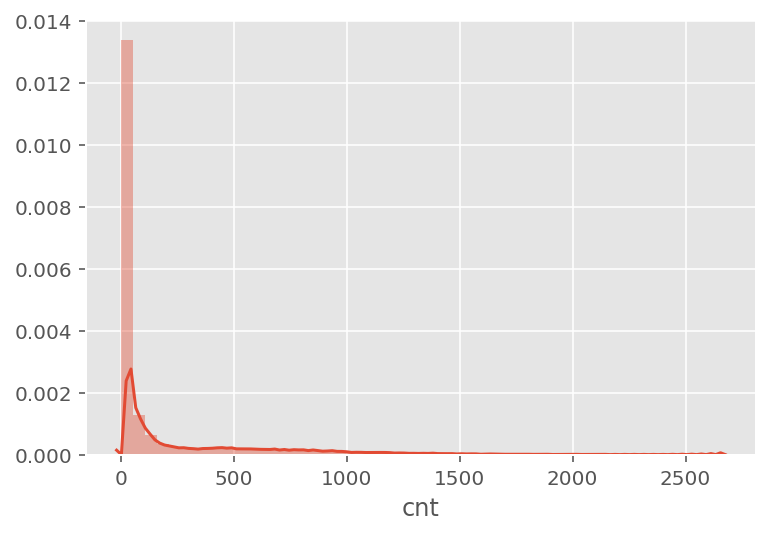

In [121]:
# overall distribution
sns.distplot(base_df['cnt']);

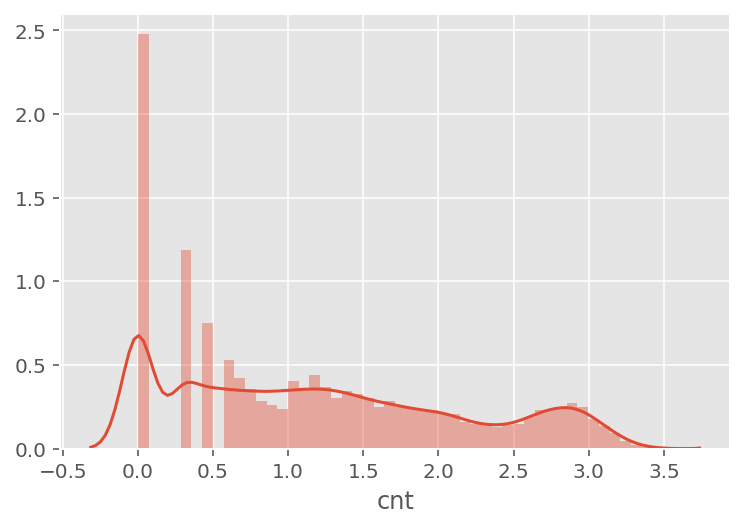

In [122]:
#overall distribution log 
sns.distplot(np.log10(base_df['cnt']));

In [123]:
###By widget

def visualize_dist_by_zipcode_at_the_same_time(df):
    def view_images(zip_code):
        fig, axs = plt.subplots(ncols=2, figsize=(15,5))

        raw_data = df.loc[df['zip_code'] == str(zip_code)]['cnt']
        log_data = np.log10(raw_data)
        ax1 = sns.distplot(raw_data, ax=axs[0]);
        ax2 = sns.distplot(log_data, ax=axs[1]);
        ax1.set_title(f'log is False, zip_code : {zip_code}')
        ax2.set_title(f'log is True, zip_code : {zip_code}')
    interact(view_images, zip_code=(10001, 10200))

In [124]:
visualize_dist_by_zipcode_at_the_same_time(base_df)

interactive(children=(IntSlider(value=10100, description='zip_code', max=10200, min=10001), Output()), _dom_cl…

In [125]:
base_df['log_cnt'] = np.log10(base_df['cnt'])

In [126]:
### Train/ Test
train_df, test_df = split_train_and_test(base_df, '2015-01-24')
train_df.tail()

zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
65113    10271 2015-01-23 23:00:00      1   23        4    23           0   
65114    10454 2015-01-23 23:00:00      1   23        4    23           0   
65115    11415 2015-01-23 23:00:00      1   23        4    23           0   
65116    11234 2015-01-23 23:00:00      1   23        4    23           0   
65117    11356 2015-01-23 23:00:00      1   23        4    23           0   

       cnt  log_cnt  
65113    1      0.0  
65114    1      0.0  
65115    1      0.0  
65116    1      0.0  
65117    1      0.0

In [127]:
del train_df['pickup_hour']
del test_df['pickup_hour']

In [128]:
train_df.head(2)

zip_code  month  day  weekday  hour  is_weekend  cnt   log_cnt
0    10005      1    1        3     0           0  105  2.021189
1    11206      1    1        3     0           0  100  2.000000

In [129]:
y_train_raw = train_df.pop('cnt')
y_train_log = train_df.pop('log_cnt')
y_test_raw = test_df.pop('cnt')
y_test_log = test_df.pop('log_cnt')

In [130]:
x_train=train_df.copy()
x_test=test_df.copy()

In [131]:
######### Simple Regression w/o One Hot Encoding 
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train_log)
pred = lr_reg.predict(x_test)
pred

array([1.41926359, 1.55127204, 1.52970203, ..., 1.48357196, 0.7027377 ,
       1.49306277])

In [132]:
test_df['pred_log']= pred
test_df['pred_reverse'] = 10**pred
test_df['real_log'] = y_test_log
test_df['real_raw'] = y_test_raw

In [133]:
def evaluation(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    score = pd.DataFrame([mape, mae, mse], index=['mape', 'mae', 'mse'], columns=['score']).T
    return score

In [134]:
evaluation(test_df['real_raw'], test_df['pred_reverse'])

mape         mae           mse
score  428.415375  126.535552  95916.687733

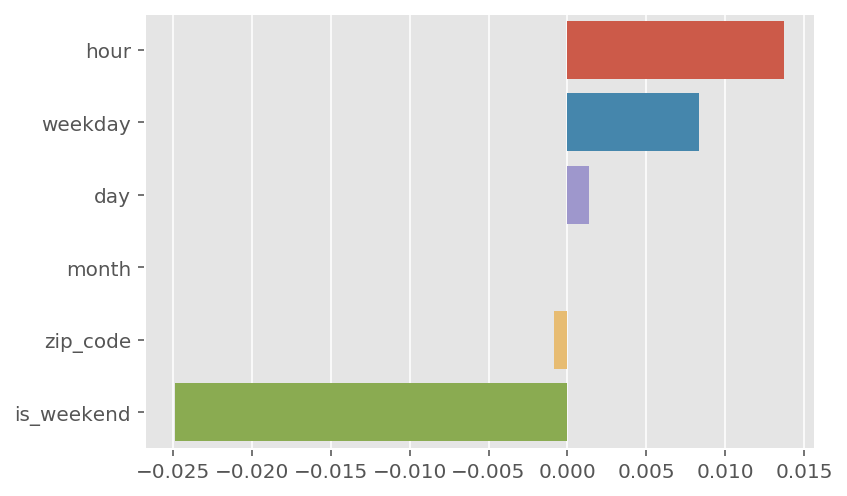

In [135]:
coef = pd.Series(lr_reg.coef_ , index=x_train.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index);